In [ ]:
from google.colab import drive

# Google 드라이브 마운트
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
creds_path = '/content/drive/MyDrive/Key/credentials.json'


In [ ]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

# Google API 인증
scope = [
    "https://spreadsheets.google.com/feeds",
    "https://www.googleapis.com/auth/spreadsheets",
    "https://www.googleapis.com/auth/drive",
]

# credentials.json 파일 경로 설정
creds_path = '/content/drive/MyDrive/Key/credentials.json'
creds = ServiceAccountCredentials.from_json_keyfile_name(creds_path, scope)
client = gspread.authorize(creds)

# 스프레드시트 열기
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0/edit?usp=sharing"
spreadsheet = client.open_by_url(spreadsheet_url)

# "db" 시트 가져오기
worksheet = spreadsheet.worksheet("db")
data = worksheet.get_all_records()

# Pandas 데이터프레임으로 변환
df = pd.DataFrame(data)

# 데이터 확인
print(df.head())


   관리지사명 실적채널  영업자      청구번호      계약번호     서비스번호                       서비스(소)  \
0  의정부지사   SP  노승진  42000596  51852000  62757317  GiGAeyes i-slim (ktt)(2210)   
1  의정부지사   SP  박헌석  41676103  51552219  62117152              GiGAeyes i-slim   
2   강북지사   SP  민유기  42051446  51898954  62858083             GiGAeyes i-guard   
3  의정부지사   SP  정성록  42332520  52161841                            단독형 II 지문리더   
4   강북지사   SP  최선혜  41775730  51644679  62318068        GiGAeyes i-slim (ktt)   

  BM                     상호  서비스상태(대)  ...     체납금액 KPI점수 반영시설   영업구역정보  \
0                    판다네탕후루  직권정지(체납)  ...       ₩0             G000503   
1                     이마트24  직권정지(체납)  ...  ₩12,010             G000501   
2     아라치(GiGAeyes i-guard)  직권정지(체납)  ...  ₩89,100             G000104   
3                    비즈원플러스        정지  ...                      G000501   
4                      스윗가든        정지  ...                      G000105   

  무인매장구분 담당자            휴대폰               최종해제일시              

In [ ]:
# '차트' 시트를 불러오기
worksheet = spreadsheet.worksheet("db")
data_chart = worksheet.get_all_records()

# Pandas 데이터프레임으로 변환
df_chart = pd.DataFrame(data_chart)

# 데이터 확인
print(df_chart.head())


   관리지사명 실적채널  영업자      청구번호      계약번호     서비스번호                       서비스(소)  \
0  의정부지사   SP  노승진  42000596  51852000  62757317  GiGAeyes i-slim (ktt)(2210)   
1  의정부지사   SP  박헌석  41676103  51552219  62117152              GiGAeyes i-slim   
2   강북지사   SP  민유기  42051446  51898954  62858083             GiGAeyes i-guard   
3  의정부지사   SP  정성록  42332520  52161841                            단독형 II 지문리더   
4   강북지사   SP  최선혜  41775730  51644679  62318068        GiGAeyes i-slim (ktt)   

  BM                     상호  서비스상태(대)  ...     체납금액 KPI점수 반영시설   영업구역정보  \
0                    판다네탕후루  직권정지(체납)  ...       ₩0             G000503   
1                     이마트24  직권정지(체납)  ...  ₩12,010             G000501   
2     아라치(GiGAeyes i-guard)  직권정지(체납)  ...  ₩89,100             G000104   
3                    비즈원플러스        정지  ...                      G000501   
4                      스윗가든        정지  ...                      G000105   

  무인매장구분 담당자            휴대폰               최종해제일시              

In [ ]:
# 데이터 구조 확인
print(df.head())        # 데이터 샘플 확인
print(df.info())        # 데이터 타입 및 결측치 확인
print(df.describe())    # 수치형 데이터 통계 요약


   관리지사명 실적채널  영업자      청구번호      계약번호     서비스번호                       서비스(소)  \
0  의정부지사   SP  노승진  42000596  51852000  62757317  GiGAeyes i-slim (ktt)(2210)   
1  의정부지사   SP  박헌석  41676103  51552219  62117152              GiGAeyes i-slim   
2   강북지사   SP  민유기  42051446  51898954  62858083             GiGAeyes i-guard   
3  의정부지사   SP  정성록  42332520  52161841                            단독형 II 지문리더   
4   강북지사   SP  최선혜  41775730  51644679  62318068        GiGAeyes i-slim (ktt)   

  BM                     상호  서비스상태(대)  ...     체납금액 KPI점수 반영시설   영업구역정보  \
0                    판다네탕후루  직권정지(체납)  ...       ₩0             G000503   
1                     이마트24  직권정지(체납)  ...  ₩12,010             G000501   
2     아라치(GiGAeyes i-guard)  직권정지(체납)  ...  ₩89,100             G000104   
3                    비즈원플러스        정지  ...                      G000501   
4                      스윗가든        정지  ...                      G000105   

  무인매장구분 담당자            휴대폰               최종해제일시              

In [ ]:
# 필요없는 공백 제거
df.columns = df.columns.str.strip()

# '체납금액' 열을 숫자로 변환
df['체납금액'] = df['체납금액'].replace({'₩': '', ',': ''}, regex=True).astype(float)

# 날짜 관련 열 변환
date_cols = ['계약시작일', '계약종료일', '정지시작일자', '정지희망종료일', '최종해제일시', '최종경계일시', '최종수신일시']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# 데이터 정리 확인
print(df.info())


ValueError: could not convert string to float: ''

In [ ]:
print(df['체납금액'].unique())


['₩0' '₩12,010' '₩89,100' '' '₩38,170' '₩38,234' '₩27,720' '₩155,375'
 '₩3,095' '₩28,870' '₩9,039' '₩7,187' '₩24,310' '₩29,865' '₩120,800'
 '₩310,621' '₩2,090' '₩41,800' '₩61,600' '₩11,000' '₩31,270' '₩94,870'
 '₩70,070' '₩47,018' '₩48,690' '₩8,800' '₩60,580' '₩10,000' '₩50,600'
 '₩59,400' '₩49,210' '₩91,330' '₩45,760' '₩247,500' '₩56,935' '₩1,100'
 '₩8,910' '₩28,230' '₩71,320' '₩2,543' '₩44,880' '₩4,664' '₩17,388'
 '₩13,145' '₩270,573' '₩31,350' '₩29,535' '₩21,560' '₩52,030' '₩19,987'
 '₩24,420' '₩13,860' '₩54,890' '₩62,150' '₩3,045' '₩6,259' '₩4,243'
 '₩15,510' '₩8,761' '₩8,346' '₩12,296' '₩12,450' '₩19,910' '₩35,695'
 '₩9,343' '₩33,664' '₩18,260' '₩9,738' '₩10,093' '₩49,720' '₩20,840'
 '₩29,861' '₩710' '₩2,046' '₩4,479' '₩3,075' '₩6,358' '₩6,281' '₩10,283'
 '₩22,752' '₩4,172' '₩5,935' '₩11,024' '₩26,840' '₩18,778' '₩2,644'
 '₩28,215' '₩38,225' '₩8,271' '₩13,970' '₩13,856' '₩15,620' '₩19,200'
 '₩6,787' '₩8,580' '₩2,465' '₩6,160' '₩11,290' '₩5,610' '₩4,065' '₩4,811'
 '₩18,645' '₩43,43

In [ ]:
# 필요없는 공백 제거
df.columns = df.columns.str.strip()

# '체납금액' 열을 숫자로 변환
df['체납금액'] = df['체납금액'].replace({'₩': '', ',': ''}, regex=True).astype(float)

# 날짜 관련 열 변환
date_cols = ['계약시작일', '계약종료일', '정지시작일자', '정지희망종료일', '최종해제일시', '최종경계일시', '최종수신일시']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# 데이터 정리 확인
print(df.info())

NameError: name 'df' is not defined

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


SMTPAuthenticationError: (534, b'5.7.9 Application-specific password required. For more information, go to\n5.7.9  https://support.google.com/mail/?p=InvalidSecondFactor d9443c01a7336-219dc964e92sm264686975ad.18 - gsmtp')

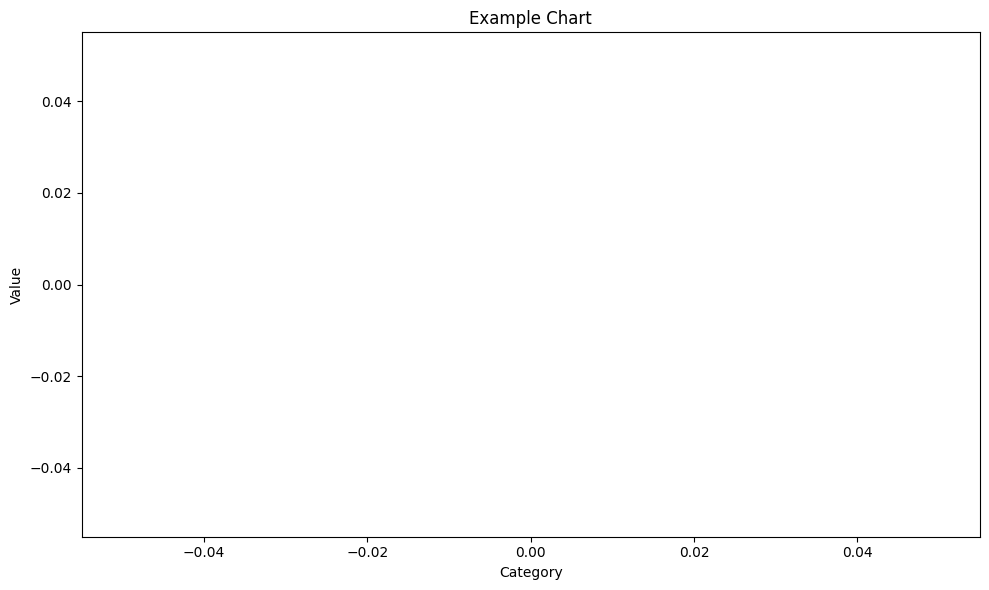

In [ ]:
# 필요한 라이브러리 설치
!pip install --upgrade gspread oauth2client matplotlib

import gspread
from oauth2client.service_account import ServiceAccountCredentials
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
import matplotlib.pyplot as plt
import io
import base64

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# 1. 구글 스프레드시트 인증 및 데이터 가져오기
def get_spreadsheet_charts(spreadsheet_id, sheet_name):
    # Google Drive 및 Sheets API 스코프 정의
    scope = [
        'https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive',
    ]
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', scope)
    client = gspread.authorize(creds)

    # 스프레드시트 열기
    sheet = client.open_by_key(spreadsheet_id).worksheet(sheet_name)

    # 데이터 가져오기 (차트는 시각적으로 표시되므로 Matplotlib로 재생성)
    data = sheet.get_all_records()
    return data

# 2. 차트 생성 (Matplotlib)
def create_chart(data, column_x, column_y, chart_title):
    plt.figure(figsize=(10, 6))
    plt.bar([row[column_x] for row in data], [row[column_y] for row in data])
    plt.title(chart_title)
    plt.xlabel(column_x)
    plt.ylabel(column_y)
    plt.tight_layout()

    # 차트를 Base64로 변환
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    base64_image = base64.b64encode(buf.read()).decode('utf-8')
    buf.close()
    return base64_image

# 3. 이메일 전송def send_email_with_charts(recipient_email, subject, body, chart_images):
    sender_email = 'bough38@gmail.com'
    sender_password = '003867'  # Gmail 앱 비밀번호 사용

    # 이메일 작성
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = recipient_email
    msg['Subject'] = subject

    # 이메일 본문 추가
    html = f"<html><body><h1>{subject}</h1>{body}"
    for chart in chart_images:
        html += f'<img src="data:image/png;base64,{chart}" style="max-width: 600px; height: auto; display: block; margin-bottom: 20px;" />'
    html += "</body></html>"
    msg.attach(MIMEText(html, 'html'))

    # SMTP 서버 연결 및 이메일 전송
    with smtplib.SMTP('smtp.gmail.com', 587) as server:
        server.starttls()
        server.login(sender_email, sender_password)
        server.send_message(msg)

    print("이메일 전송 완료")

# 4. 실행 코드
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'  # 스프레드시트 ID 입력
sheet_name = '차트'  # 시트 이름 입력

# 스프레드시트 데이터 가져오기
data = get_spreadsheet_charts(spreadsheet_id, sheet_name)

# 차트 생성
chart_images = [create_chart(data, 'Category', 'Value', 'Example Chart')]  # 열 이름에 맞게 수정

# 이메일 전송
send_email_with_charts('bough38@gmail.com', '차트 목록', '아래는 차트입니다.', chart_images)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Google Drive 마운트

# 'Key' 폴더 내용 확인
!ls /content/drive/My\ Drive/Key/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'credentials (1).json'	 credentials.json


In [ ]:
# 필요한 라이브러리 설치
!pip install --upgrade gspread oauth2client pandas matplotlib

import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# Google Drive 및 Sheets API 인증
def get_spreadsheet_data(spreadsheet_id, sheet_name):
    scope = [
        'https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive',
    ]
    # credentials.json 파일 경로
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', scope)
    client = gspread.authorize(creds)

    # 스프레드시트 열기
    sheet = client.open_by_key(spreadsheet_id).worksheet(sheet_name)
    data = sheet.get_all_records()  # 데이터를 딕셔너리 형태로 가져오기
    return pd.DataFrame(data)  # DataFrame으로 변환

# 스프레드시트 ID와 시트 이름 설정
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'
sheet_name = 'db'

# 데이터 가져오기
data = get_spreadsheet_data(spreadsheet_id, sheet_name)

# 데이터 확인
print(data.head())  # 상위 5개 행 출력
print(data.columns)  # 컬럼 이름 출력

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   관리지사명 실적채널  영업자      청구번호      계약번호     서비스번호                       서비스(소)  \
0  의정부지사   SP  노승진  42000596  51852000  62757317  GiGAeyes i-slim (ktt)(2210)   
1  의정부지사   SP  박헌석  41676103  51552219  62117152              GiGAeyes i-slim   
2   강북지사   SP  민유기  42051446  51898954  62858083             GiGAeyes i-guard   
3  의정부지사   SP  정성록  42332520  52161841                            단독형 II 지문리더   
4   강북지사   SP  최선혜  41775730  51644679  62318068        GiGAeyes i-slim (ktt)   

  BM                     상호  서비스상태(대)  ...     체납금액 KPI점수 반영시설   영업구역정보  \
0                    판다네탕후루  직권정지(체납)  ...       ₩0             G000503   
1                     이마트24  직권정지(체납)  ...  ₩12,010             G000501   
2     아라치(GiGAeyes i-guard)  직권정지(체납)  ...  ₩89,100             G000104   
3                    비즈원플러스        정지  ...                      G000501   
4        

In [ ]:
# 데이터 확인
print(data.columns)

Index(['관리지사명', '실적채널', '영업자', '청구번호', '계약번호', '서비스번호', '서비스(소)', 'BM', '상호',
       '서비스상태(대)', '설치주소', 'KTT월정료', '계약시작일', '계약종료일', '정지비고', '정지시작일자',
       '정지희망종료일', '관리구분대상', '구분사유', '당월관리조치', '정지일수', '정지사유', '관리구분', '비고',
       '체납금액', 'KPI점수 반영시설', '영업구역정보', '무인매장구분', '담당자', '휴대폰', '최종해제일시',
       '최종경계일시', '최종신호', '최종수신일시'],
      dtype='object')


In [ ]:
# 이메일 전송 함수
def send_email_with_charts(recipient_email, subject, body, chart_images):
    sender_email = 'bough38@gmail.com'
    sender_password = '003867!!'  # 앱 비밀번호 입력

    # 이메일 작성
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = recipient_email
    msg['Subject'] = subject

    # HTML 본문에 차트 삽입
    html = f"<html><body><h1>{subject}</h1>{body}"
    for chart in chart_images:
        html += f'<img src="data:image/png;base64,{chart}" style="max-width: 600px; height: auto; display: block; margin-bottom: 20px;" />'
    html += "</body></html>"
    msg.attach(MIMEText(html, 'html'))

    # SMTP 서버 연결 및 이메일 전송
    with smtplib.SMTP('smtp.gmail.com', 587) as server:
        server.starttls()
        server.login(sender_email, sender_password)
        server.send_message(msg)

    print("이메일 전송 완료")

In [ ]:
def send_email_with_charts(recipient_email, subject, body, chart_images):
    import smtplib
    from email.mime.multipart import MIMEMultipart
    from email.mime.text import MIMEText

    sender_email = 'bough38@gmail.com'
    sender_password = 'kmtmkuwaozdplldr'  # Gmail 앱 비밀번호 입력

    try:
        # 이메일 작성
        msg = MIMEMultipart()
        msg['From'] = sender_email
        msg['To'] = recipient_email
        msg['Subject'] = subject

        # HTML 본문에 차트 삽입
        html = f"<html><body><h1>{subject}</h1>{body}"
        for chart in chart_images:
            html += f'<img src="data:image/png;base64,{chart}" style="max-width: 600px; height: auto; display: block; margin-bottom: 20px;" />'
        html += "</body></html>"
        msg.attach(MIMEText(html, 'html'))

        # SMTP 서버 연결
        print("SMTP 서버에 연결 중...")
        with smtplib.SMTP('smtp.gmail.com', 587) as server:
            server.starttls()
            print("SMTP 인증 중...")
            server.login(sender_email, sender_password)
            print("SMTP 인증 성공")

            # 이메일 전송
            print("이메일 전송 중...")
            server.send_message(msg)
            print("이메일 전송 완료")

    excdef send_email_with_charts(recipient_email, subject, body, chart_images):
    sender_email = 'your_email@gmail.com'
    sender_password = '앱 비밀번호 입력'

    try:
        msg = MIMEMultipart()
        msg['From'] = sender_email
        msg['To'] = recipient_email
        msg['Subject'] = subject

        html = f"<html><body>{body}"
        for chart in chart_images:
            html += f'<img src="data:image/png;base64,{chart}" style="max-width: 600px;" />'
        html += "</body></html>"
        msg.attach(MIMEText(html, 'html'))

        with smtplib.SMTP('smtp.gmail.com', 587) as server:
            server.starttls()
            server.login(sender_email, sender_password)
            server.send_message(msg)
        print("이메일 전송 완료")
    except Exception as e:
        print(f"에러 발생: {e}")ept smtplib.SMTPAuthenticationError as e:
        print(f"SMTP 인증 오류: {e}")
    except smtplib.SMTPException as e:
        print(f"SMTP 서버 오류: {e}")
    except Exception as e:
        print(f"기타 오류: {e}")

SyntaxError: expected 'except' or 'finally' block (<ipython-input-32-43d3546df1ee>, line 36)

In [ ]:
# 필요한 라이브러리 설치
!pip install --upgrade matplotlib pandas gspread oauth2client

import matplotlib.pyplot as plt
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import io
import base64
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

# Google Drive 및 Sheets API 인증
def get_spreadsheet_data(spreadsheet_id, sheet_name):
    scope = [
        'https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive',
    ]
    # credentials.json 파일 경로
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', scope)
    client = gspread.authorize(creds)

    # 스프레드시트 열기
    sheet = client.open_by_key(spreadsheet_id).worksheet(sheet_name)
    data = sheet.get_all_records()  # 데이터를 딕셔너리 형태로 가져오기
    return pd.DataFrame(data)  # DataFrame으로 변환

# 차트 생성 함수
def create_chart(data, group_by_column, value_column, chart_title):
    # 금액 데이터 처리: ₩, 쉼표 제거 및 빈 문자열 처리
    data[value_column] = (
        data[value_column]
        .replace('[₩,]', '', regex=True)  # ₩와 쉼표 제거
        .replace('', '0')  # 빈 문자열을 0으로 대체
        .astype(float)  # 숫자로 변환
    )
    grouped_data = data.groupby(group_by_column)[value_column].sum().reset_index()

    # 차트 생성
    plt.figure(figsize=(10, 6))
    plt.bar(grouped_data[group_by_column], grouped_data[value_column])
    plt.title(chart_title)
    plt.xlabel(group_by_column)
    plt.ylabel(value_column)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # 차트를 Base64로 변환
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    base64_image = base64.b64encode(buf.read()).decode('utf-8')
    buf.close()
    plt.close()
    return base64_image

# 이메일 전송 함수
def send_email_with_charts(recipient_email, subject, body, chart_images):
    sender_email = 'bough38@gmail.com'
    sender_password = 'kmtmkuwaozdpllbr'  # 띄어쓰기 제거
    try:
        # 이메일 작성
        msg = MIMEMultipart()
        msg['From'] = sender_email
        msg['To'] = recipient_email
        msg['Subject'] = subject

        # HTML 본문에 차트 삽입
        html = f"<html><body><h1>{subject}</h1>{body}"
        for chart in chart_images:
            html += f'<img src="data:image/png;base64,{chart}" style="max-width: 600px; height: auto; display: block; margin-bottom: 20px;" />'
        html += "</body></html>"
        msg.attach(MIMEText(html, 'html'))

        # SMTP 서버 연결
        print("SMTP 서버에 연결 중...")
        with smtplib.SMTP('smtp.gmail.com', 587) as server:
            server.starttls()
            print("SMTP 인증 중...")
            server.login(sender_email, sender_password)
            print("SMTP 인증 성공")

            # 이메일 전송
            print("이메일 전송 중...")
            server.send_message(msg)
            print("이메일 전송 완료")

    except smtplib.SMTPAuthenticationError as e:
        print(f"SMTP 인증 오류: {e}")
    except smtplib.SMTPException as e:
        print(f"SMTP 서버 오류: {e}")
    except Exception as e:
        print(f"기타 오류 발생: {e}")

# 실행 코드
# 스프레드시트 ID와 시트 이름 설정
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'
sheet_name = 'db'

# 데이터 가져오기
data = get_spreadsheet_data(spreadsheet_id, sheet_name)

# 차트 생성
chart_images = []
chart_images.append(create_chart(data, '관리지사명', '체납금액', '관리지사명별 체납금액 합계'))
chart_images.append(create_chart(data, '관리지사명', 'KTT월정료', '관리지사명별 KTT월정료 합계'))

# 이메일 전송
send_email_with_charts('bough38@gmail.com', '관리지사별 데이터 차트', '아래는 생성된 차트입니다.', chart_images)

<ipython-input-35-bb3f71866a01>:47: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()
<ipython-input-35-bb3f71866a01>:47: UserWarning: Glyph 47497 (\N{HANGUL SYLLABLE REUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-35-bb3f71866a01>:47: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-35-bb3f71866a01>:47: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
<ipython-input-35-bb3f71866a01>:47: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  plt.tight_layout()
<ipython-input-35-bb3f71866a01>:47: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  plt.tight_layout()
<ipython-input-35-bb3f71866a01>:47: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  plt.tight_layout()
<ipython-input-35-bb3f71866a01>:47: UserWarning: Glyph

SMTP 서버에 연결 중...
SMTP 인증 중...
SMTP 인증 성공
이메일 전송 중...
이메일 전송 완료


In [ ]:
# 필요한 라이브러리 설치
!pip install --upgrade matplotlib pandas gspread oauth2client

import matplotlib.pyplot as plt
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import io
import base64
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

# Google Sheets 인증 및 데이터 가져오기
def get_spreadsheet_data(spreadsheet_id, sheet_name):
    scope = [
        'https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive',
    ]
    # credentials.json 파일 경로
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', scope)
    client = gspread.authorize(creds)

    # 스프레드시트 열기
    sheet = client.open_by_key(spreadsheet_id).worksheet(sheet_name)
    data = sheet.get_all_records()  # 데이터를 딕셔너리 형태로 가져오기
    return pd.DataFrame(data)  # DataFrame으로 변환

# 차트 생성 함수
def create_chart(data, group_by_column, value_column, chart_title):
    try:
        # 금액 데이터 처리: ₩, 쉼표 제거 및 빈 문자열 처리
        data[value_column] = (
            data[value_column]
            .replace('[₩,]', '', regex=True)  # ₩와 쉼표 제거
            .replace('', '0')  # 빈 문자열을 0으로 대체
            .astype(float)  # 숫자로 변환
        )
        grouped_data = data.groupby(group_by_column)[value_column].sum().reset_index()

        # 차트 생성
        plt.figure(figsize=(10, 6))
        plt.bar(grouped_data[group_by_column], grouped_data[value_column])
        plt.title(chart_title)
        plt.xlabel(group_by_column)
        plt.ylabel(value_column)
        plt.xticks(rotation=45)
        plt.tight_layout()

        # 차트를 Base64로 변환
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        base64_image = base64.b64encode(buf.read()).decode('utf-8')
        buf.close()
        plt.close()
        return base64_image
    except Exception as e:
        print(f"차트 생성 오류: {e}")
        return None

# 이메일 전송 함수
def send_email_with_charts(recipient_email, subject, body, chart_images):
    sender_email = 'bough38@gmail.com'
    sender_password = 'kmtmkuwaozdpllbr'  # Gmail 앱 비밀번호 입력

    try:
        # 이메일 작성
        msg = MIMEMultipart()
        msg['From'] = sender_email
        msg['To'] = recipient_email
        msg['Subject'] = subject

        # HTML 본문에 차트 삽입
        html = f"<html><body><h1>{subject}</h1>{body}"
        for i, chart in enumerate(chart_images):
            if chart:
                # 차트 Base64 데이터 디버깅 출력
                print(f"Chart {i+1} Base64 Length: {len(chart)}")
                html += f'<img src="data:image/png;base64,{chart}" style="max-width: 600px; height: auto; display: block; margin-bottom: 20px;" />'
            else:
                print(f"Chart {i+1} is empty or invalid.")
        html += "</body></html>"
        msg.attach(MIMEText(html, 'html'))

        # SMTP 서버 연결
        print("SMTP 서버에 연결 중...")
        with smtplib.SMTP('smtp.gmail.com', 587) as server:
            server.starttls()
            print("SMTP 인증 중...")
            server.login(sender_email, sender_password)
            print("SMTP 인증 성공")

            # 이메일 전송
            print("이메일 전송 중...")
            server.send_message(msg)
            print("이메일 전송 완료")

    except smtplib.SMTPAuthenticationError as e:
        print(f"SMTP 인증 오류: {e}")
    except smtplib.SMTPException as e:
        print(f"SMTP 서버 오류: {e}")
    except Exception as e:
        print(f"기타 오류 발생: {e}")

# 실행 코드
# 스프레드시트 ID와 시트 이름 설정
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'
sheet_name = 'db'

# 데이터 가져오기
data = get_spreadsheet_data(spreadsheet_id, sheet_name)

# 차트 생성
chart_images = []
chart_images.append(create_chart(data, '관리지사명', '체납금액', '관리지사명별 체납금액 합계'))
chart_images.append(create_chart(data, '관리지사명', 'KTT월정료', '관리지사명별 KTT월정료 합계'))

# 이메일 전송
send_email_with_charts('bough38@gmail.com', '관리지사별 데이터 차트', '아래는 생성된 차트입니다.', chart_images)

<ipython-input-37-bfacfc9d789e>:48: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()
<ipython-input-37-bfacfc9d789e>:48: UserWarning: Glyph 47497 (\N{HANGUL SYLLABLE REUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-37-bfacfc9d789e>:48: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-37-bfacfc9d789e>:48: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
<ipython-input-37-bfacfc9d789e>:48: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  plt.tight_layout()
<ipython-input-37-bfacfc9d789e>:48: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  plt.tight_layout()
<ipython-input-37-bfacfc9d789e>:48: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  plt.tight_layout()
<ipython-input-37-bfacfc9d789e>:48: UserWarning: Glyph

Chart 1 Base64 Length: 14840
Chart 2 Base64 Length: 17504
SMTP 서버에 연결 중...
SMTP 인증 중...
SMTP 인증 성공
이메일 전송 중...
이메일 전송 완료


In [ ]:
# 필요한 라이브러리 설치
!pip install --upgrade matplotlib pandas gspread oauth2client

import matplotlib.pyplot as plt
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import io
import base64
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

# Google Sheets 인증 및 데이터 가져오기
def get_spreadsheet_data(spreadsheet_id, sheet_name):
    scope = [
        'https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive',
    ]
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', scope)
    client = gspread.authorize(creds)

    sheet = client.open_by_key(spreadsheet_id).worksheet(sheet_name)
    data = sheet.get_all_records()
    return pd.DataFrame(data)

# 차트 생성 함수
def create_chart(data, group_by_column, value_column, chart_title):
    try:
        # 데이터 정리 및 변환
        data[value_column] = (
            data[value_column]
            .replace('[₩,]', '', regex=True)  # ₩와 쉼표 제거
            .replace('', '0')  # 빈 값 처리
            .astype(float)
        )
        grouped_data = data.groupby(group_by_column)[value_column].sum().reset_index()

        # 차트 생성
        plt.figure(figsize=(10, 6))
        plt.bar(grouped_data[group_by_column], grouped_data[value_column])
        plt.title(chart_title)
        plt.xlabel(group_by_column)
        plt.ylabel(value_column)
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Base64로 변환
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        base64_image = base64.b64encode(buf.read()).decode('utf-8')
        buf.close()
        plt.close()

        # 디버깅: 차트가 정상적으로 생성되었는지 확인
        print(f"차트 생성 성공: {chart_title}, Base64 길이: {len(base64_image)}")
        return base64_image
    except Exception as e:
        print(f"차트 생성 오류 ({chart_title}): {e}")
        return None

# 이메일 전송 함수
def send_email_with_charts(recipient_email, subject, body, chart_images):
    sender_email = 'bough38@gmail.com'
    sender_password = 'kmtmkuwaozdpllbr'  # Gmail 앱 비밀번호

    try:
        msg = MIMEMultipart()
        msg['From'] = sender_email
        msg['To'] = recipient_email
        msg['Subject'] = subject

        # HTML 본문 작성
        html = f"<html><body><h1>{subject}</h1>{body}"
        for i, chart in enumerate(chart_images):
            if chart:
                html += f'<img src="data:image/png;base64,{chart}" style="max-width: 600px; height: auto; display: block; margin-bottom: 20px;" />'
            else:
                print(f"차트 {i+1} 생성 실패. 차트가 이메일에 포함되지 않습니다.")
        html += "</body></html>"
        msg.attach(MIMEText(html, 'html'))

        # SMTP 전송
        print("SMTP 서버에 연결 중...")
        with smtplib.SMTP('smtp.gmail.com', 587) as server:
            server.starttls()
            print("SMTP 인증 중...")
            server.login(sender_email, sender_password)
            print("SMTP 인증 성공")
            server.send_message(msg)
            print("이메일 전송 완료")

    except smtplib.SMTPAuthenticationError as e:
        print(f"SMTP 인증 오류: {e}")
    except smtplib.SMTPException as e:
        print(f"SMTP 서버 오류: {e}")
    except Exception as e:
        print(f"기타 오류 발생: {e}")

# 실행 코드
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'
sheet_name = 'db'

# 데이터 가져오기
data = get_spreadsheet_data(spreadsheet_id, sheet_name)

# 차트 생성
chart_images = []
chart_images.append(create_chart(data, '관리지사명', '체납금액', '관리지사명별 체납금액 합계'))
chart_images.append(create_chart(data, '관리지사명', 'KTT월정료', '관리지사명별 KTT월정료 합계'))

# 이메일 전송
send_email_with_charts('bough38@gmail.com', '관리지사별 데이터 차트', '아래는 생성된 차트입니다.', chart_images)

<ipython-input-38-876522e8ccf9>:46: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()
<ipython-input-38-876522e8ccf9>:46: UserWarning: Glyph 47497 (\N{HANGUL SYLLABLE REUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-38-876522e8ccf9>:46: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-38-876522e8ccf9>:46: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
<ipython-input-38-876522e8ccf9>:46: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  plt.tight_layout()
<ipython-input-38-876522e8ccf9>:46: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  plt.tight_layout()
<ipython-input-38-876522e8ccf9>:46: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  plt.tight_layout()
<ipython-input-38-876522e8ccf9>:46: UserWarning: Glyph

차트 생성 성공: 관리지사명별 체납금액 합계, Base64 길이: 14840


<ipython-input-38-876522e8ccf9>:46: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()
<ipython-input-38-876522e8ccf9>:46: UserWarning: Glyph 47497 (\N{HANGUL SYLLABLE REUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-38-876522e8ccf9>:46: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-38-876522e8ccf9>:46: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
<ipython-input-38-876522e8ccf9>:46: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  plt.tight_layout()
<ipython-input-38-876522e8ccf9>:46: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  plt.tight_layout()
<ipython-input-38-876522e8ccf9>:46: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  plt.tight_layout()
<ipython-input-38-876522e8ccf9>:46: UserWarning: Glyph

차트 생성 성공: 관리지사명별 KTT월정료 합계, Base64 길이: 17504
SMTP 서버에 연결 중...
SMTP 인증 중...
SMTP 인증 성공
이메일 전송 완료


In [ ]:
# 필요한 라이브러리 설치
!pip install --upgrade matplotlib pandas gspread oauth2client google-api-python-client

import matplotlib.pyplot as plt
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
import io
import base64
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

# Google Sheets 인증 및 데이터 가져오기
def get_spreadsheet_data(spreadsheet_id, sheet_name):
    scope = [
        'https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive',
    ]
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', scope)
    client = gspread.authorize(creds)
    sheet = client.open_by_key(spreadsheet_id).worksheet(sheet_name)
    data = sheet.get_all_records()
    return pd.DataFrame(data)

# 차트 생성 함수
def create_chart(data, group_by_column, value_column, chart_title):
    try:
        data[value_column] = (
            data[value_column]
            .replace('[₩,]', '', regex=True)
            .replace('', '0')
            .astype(float)
        )
        grouped_data = data.groupby(group_by_column)[value_column].sum().reset_index()
        plt.figure(figsize=(10, 6))
        plt.bar(grouped_data[group_by_column], grouped_data[value_column])
        plt.title(chart_title)
        plt.xlabel(group_by_column)
        plt.ylabel(value_column)
        plt.xticks(rotation=45)
        plt.tight_layout()
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        base64_image = base64.b64encode(buf.read()).decode('utf-8')
        buf.close()
        plt.close()
        return base64_image
    except Exception as e:
        print(f"차트 생성 오류 ({chart_title}): {e}")
        return None

# HTML 파일 저장 함수
def save_charts_as_html(chart_images, output_path='charts.html'):
    html = "<html><body><h1>차트 목록</h1>"
    for i, chart in enumerate(chart_images):
        if chart:
            html += f'<h2>차트 {i+1}</h2>'
            html += f'<img src="data:image/png;base64,{chart}" style="max-width: 600px; height: auto; display: block; margin-bottom: 20px;" />'
        else:
            html += f"<p>차트 {i+1} 생성 실패</p>"
    html += "</body></html>"
    with open(output_path, 'w', encoding='utf-8') as f:
        f.write(html)
    print(f"HTML 파일 저장 완료: {output_path}")
    return output_path

# Google Drive에 파일 업로드 및 링크 생성
def upload_to_google_drive(file_path):
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', [
        'https://www.googleapis.com/auth/drive'
    ])
    drive_service = build('drive', 'v3', credentials=creds)

    file_metadata = {
        'name': file_path.split('/')[-1],
        'mimeType': 'text/html'
    }
    media = MediaFileUpload(file_path, mimetype='text/html')
    uploaded_file = drive_service.files().create(
        body=file_metadata,
        media_body=media,
        fields='id'
    ).execute()

    file_id = uploaded_file.get('id')

    # 링크 공유 설정
    drive_service.permissions().create(
        fileId=file_id,
        body={'type': 'anyone', 'role': 'reader'},
    ).execute()

    share_link = f"https://drive.google.com/file/d/{file_id}/view"
    print(f"파일 링크 생성 완료: {share_link}")
    return share_link

# 이메일 전송 함수
def send_email_with_html_link(recipient_email, subject, body, share_link):
    sender_email = 'bough38@gmail.com'
    sender_password = 'kmtmkuwaozdpllbr'
    try:
        msg = MIMEMultipart()
        msg['From'] = sender_email
        msg['To'] = recipient_email
        msg['Subject'] = subject
        html_content = f"<html><body><h1>{subject}</h1><p>{body}</p><p><a href='{share_link}'>차트를 확인하려면 클릭하세요</a></p></body></html>"
        msg.attach(MIMEText(html_content, 'html'))
        print("SMTP 서버에 연결 중...")
        with smtplib.SMTP('smtp.gmail.com', 587) as server:
            server.starttls()
            print("SMTP 인증 중...")
            server.login(sender_email, sender_password)
            print("SMTP 인증 성공")
            server.send_message(msg)
            print("이메일 전송 완료")
    except Exception as e:
        print(f"오류 발생: {e}")

# 실행
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'
sheet_name = 'db'
data = get_spreadsheet_data(spreadsheet_id, sheet_name)
chart_images = []
chart_images.append(create_chart(data, '관리지사명', '체납금액', '관리지사명별 체납금액 합계'))
chart_images.append(create_chart(data, '관리지사명', 'KTT월정료', '관리지사명별 KTT월정료 합계'))
html_file = save_charts_as_html(chart_images)
share_link = upload_to_google_drive(html_file)
send_email_with_html_link('bough38@gmail.com', '관리지사별 데이터 차트', '아래 링크를 클릭하여 차트를 확인하세요.', share_link)

In [ ]:
# 한글 폰트 설치 및 설정
!apt-get update -qq
!apt-get install -qq fonts-nanum

# Matplotlib에 한글 폰트 적용
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def set_korean_font():
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
    print(f"한글 폰트 설정 완료: {font_prop.get_name()}")

set_korean_font()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
한글 폰트 설정 완료: NanumGothic


In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
import io
import base64
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

# 한글 폰트 설정
def set_korean_font():
    import matplotlib.font_manager as fm
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # Colab에서 제공하는 나눔고딕 폰트 경로
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
    print(f"한글 폰트 설정 완료: {font_prop.get_name()}")

set_korean_font()

# Google Sheets 인증 및 데이터 가져오기
def get_spreadsheet_data(spreadsheet_id, sheet_name):
    scope = [
        'https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive',
    ]
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', scope)
    client = gspread.authorize(creds)
    sheet = client.open_by_key(spreadsheet_id).worksheet(sheet_name)
    data = sheet.get_all_records()
    return pd.DataFrame(data)

# 차트 생성 함수
def create_chart(data, group_by_column, value_column, chart_title):
    try:
        data[value_column] = (
            data[value_column]
            .replace('[₩,]', '', regex=True)
            .replace('', '0')
            .astype(float)
        )
        grouped_data = data.groupby(group_by_column)[value_column].sum().reset_index()
        plt.figure(figsize=(10, 6))
        plt.bar(grouped_data[group_by_column], grouped_data[value_column])
        plt.title(chart_title)
        plt.xlabel(group_by_column)
        plt.ylabel(value_column)
        plt.xticks(rotation=45)
        plt.tight_layout()
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        base64_image = base64.b64encode(buf.read()).decode('utf-8')
        buf.close()
        plt.close()
        return base64_image
    except Exception as e:
        print(f"차트 생성 오류 ({chart_title}): {e}")
        return None

# HTML 파일 저장 함수
def save_charts_as_html(chart_images, output_path='charts.html'):
    html = "<html><body><h1>차트 목록</h1>"
    for i, chart in enumerate(chart_images):
        if chart:
            html += f'<h2>차트 {i+1}</h2>'
            html += f'<img src="data:image/png;base64,{chart}" style="max-width: 600px; height: auto; display: block; margin-bottom: 20px;" />'
        else:
            html += f"<p>차트 {i+1} 생성 실패</p>"
    html += "</body></html>"
    with open(output_path, 'w', encoding='utf-8') as f:
        f.write(html)
    print(f"HTML 파일 저장 완료: {output_path}")
    return output_path

# Google Drive에 파일 업로드 및 링크 생성
def upload_to_google_drive(file_path):
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', [
        'https://www.googleapis.com/auth/drive'
    ])
    drive_service = build('drive', 'v3', credentials=creds)

    file_metadata = {
        'name': file_path.split('/')[-1],
        'mimeType': 'text/html'
    }
    media = MediaFileUpload(file_path, mimetype='text/html')
    uploaded_file = drive_service.files().create(
        body=file_metadata,
        media_body=media,
        fields='id'
    ).execute()

    file_id = uploaded_file.get('id')

    # 링크 공유 설정
    drive_service.permissions().create(
        fileId=file_id,
        body={'type': 'anyone', 'role': 'reader'},
    ).execute()

    share_link = f"https://drive.google.com/file/d/{file_id}/view"
    print(f"파일 링크 생성 완료: {share_link}")
    return share_link

# 이메일 전송 함수
def send_email_with_html_link(recipient_email, subject, body, share_link):
    sender_email = 'bough38@gmail.com'
    sender_password = 'kmtmkuwaozdpllbr'
    try:
        msg = MIMEMultipart()
        msg['From'] = sender_email
        msg['To'] = recipient_email
        msg['Subject'] = subject
        html_content = f"<html><body><h1>{subject}</h1><p>{body}</p><p><a href='{share_link}'>차트를 확인하려면 클릭하세요</a></p></body></html>"
        msg.attach(MIMEText(html_content, 'html'))
        print("SMTP 서버에 연결 중...")
        with smtplib.SMTP('smtp.gmail.com', 587) as server:
            server.starttls()
            print("SMTP 인증 중...")
            server.login(sender_email, sender_password)
            print("SMTP 인증 성공")
            server.send_message(msg)
            print("이메일 전송 완료")
    except Exception as e:
        print(f"오류 발생: {e}")

# 실행
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'
sheet_name = 'db'
data = get_spreadsheet_data(spreadsheet_id, sheet_name)
chart_images = []
chart_images.append(create_chart(data, '관리지사명', '체납금액', '관리지사명별 체납금액 합계'))
chart_images.append(create_chart(data, '관리지사명', 'KTT월정료', '관리지사명별 KTT월정료 합계'))
html_file = save_charts_as_html(chart_images)
share_link = upload_to_google_drive(html_file)
send_email_with_html_link('bough38@gmail.com', '관리지사별 데이터 차트', '아래 링크를 클릭하여 차트를 확인하세요.', share_link)

한글 폰트 설정 완료: NanumGothic


<ipython-input-43-1e286883acc9>:52: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()
<ipython-input-43-1e286883acc9>:52: UserWarning: Glyph 47497 (\N{HANGUL SYLLABLE REUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-43-1e286883acc9>:52: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-43-1e286883acc9>:52: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
<ipython-input-43-1e286883acc9>:52: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  plt.tight_layout()
<ipython-input-43-1e286883acc9>:52: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  plt.tight_layout()
<ipython-input-43-1e286883acc9>:52: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  plt.tight_layout()
<ipython-input-43-1e286883acc9>:52: UserWarning: Glyph

HTML 파일 저장 완료: charts.html
파일 링크 생성 완료: https://drive.google.com/file/d/1fWjQBR6Jf9-hUqC-jotpbaD4cmGlTJ9q/view
SMTP 서버에 연결 중...
SMTP 인증 중...
SMTP 인증 성공
이메일 전송 완료


In [ ]:
# 필요한 라이브러리 설치
!apt-get update -qq
!apt-get install -qq fonts-nanum
!pip install --upgrade matplotlib pandas gspread oauth2client google-api-python-client

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
import io
import base64
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

# 한글 폰트 설정 함수
def set_korean_font():
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    return font_prop

korean_font = set_korean_font()

# Google Sheets 인증 및 데이터 가져오기
def get_spreadsheet_data(spreadsheet_id, sheet_name):
    scope = [
        'https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive',
    ]
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', scope)
    client = gspread.authorize(creds)
    sheet = client.open_by_key(spreadsheet_id).worksheet(sheet_name)
    data = sheet.get_all_records()
    return pd.DataFrame(data)

# 차트 생성 함수
def create_chart(data, group_by_column, value_column, chart_title):
    try:
        # 데이터 정리 및 변환
        data[value_column] = (
            data[value_column]
            .replace('[₩,]', '', regex=True)
            .replace('', '0')
            .astype(float)
        )
        grouped_data = data.groupby(group_by_column)[value_column].sum().reset_index()

        # 차트 생성
        plt.figure(figsize=(10, 6))
        bars = plt.bar(grouped_data[group_by_column], grouped_data[value_column])

        # 제목, 축 레이블, 눈금에 한글 폰트 적용
        plt.title(chart_title, fontproperties=korean_font, fontsize=14)
        plt.xlabel(group_by_column, fontproperties=korean_font, fontsize=12)
        plt.ylabel(value_column, fontproperties=korean_font, fontsize=12)

        # X축 눈금에 폰트 적용
        plt.xticks(fontproperties=korean_font, rotation=45)
        plt.yticks(fontproperties=korean_font)

        # 값 레이블 표시
        for bar in bars:
            yval = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                yval,
                f"{yval:.0f}",
                ha='center',
                va='bottom',
                fontproperties=korean_font,
                fontsize=10
            )

        # 레이아웃 설정
        plt.tight_layout()

        # Base64로 변환
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        base64_image = base64.b64encode(buf.read()).decode('utf-8')
        buf.close()
        plt.close()

        return base64_image
    except Exception as e:
        print(f"차트 생성 오류 ({chart_title}): {e}")
        return None

# HTML 파일 저장 함수
def save_charts_as_html(chart_images, output_path='charts.html'):
    html = "<html><body><h1>차트 목록</h1>"
    for i, chart in enumerate(chart_images):
        if chart:
            html += f'<h2>차트 {i+1}</h2>'
            html += f'<img src="data:image/png;base64,{chart}" style="max-width: 600px; height: auto; display: block; margin-bottom: 20px;" />'
        else:
            html += f"<p>차트 {i+1} 생성 실패</p>"
    html += "</body></html>"
    with open(output_path, 'w', encoding='utf-8') as f:
        f.write(html)
    print(f"HTML 파일 저장 완료: {output_path}")
    return output_path

# Google Drive에 파일 업로드 및 링크 생성
def upload_to_google_drive(file_path):
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', [
        'https://www.googleapis.com/auth/drive'
    ])
    drive_service = build('drive', 'v3', credentials=creds)

    file_metadata = {
        'name': file_path.split('/')[-1],
        'mimeType': 'text/html'
    }
    media = MediaFileUpload(file_path, mimetype='text/html')
    uploaded_file = drive_service.files().create(
        body=file_metadata,
        media_body=media,
        fields='id'
    ).execute()

    file_id = uploaded_file.get('id')

    # 링크 공유 설정
    drive_service.permissions().create(
        fileId=file_id,
        body={'type': 'anyone', 'role': 'reader'},
    ).execute()

    share_link = f"https://drive.google.com/file/d/{file_id}/view"
    print(f"파일 링크 생성 완료: {share_link}")
    return share_link

# 이메일 전송 함수
def send_email_with_html_link(recipient_email, subject, body, share_link):
    sender_email = 'bough38@gmail.com'
    sender_password = 'kmtmkuwaozdpllbr'
    try:
        msg = MIMEMultipart()
        msg['From'] = sender_email
        msg['To'] = recipient_email
        msg['Subject'] = subject
        html_content = f"<html><body><h1>{subject}</h1><p>{body}</p><p><a href='{share_link}'>차트를 확인하려면 클릭하세요</a></p></body></html>"
        msg.attach(MIMEText(html_content, 'html'))
        print("SMTP 서버에 연결 중...")
        with smtplib.SMTP('smtp.gmail.com', 587) as server:
            server.starttls()
            print("SMTP 인증 중...")
            server.login(sender_email, sender_password)
            print("SMTP 인증 성공")
            server.send_message(msg)
            print("이메일 전송 완료")
    except Exception as e:
        print(f"오류 발생: {e}")

# 실행
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'
sheet_name = 'db'
data = get_spreadsheet_data(spreadsheet_id, sheet_name)
chart_images = []
chart_images.append(create_chart(data, '관리지사명', '체납금액', '관리지사명별 체납금액 합계'))
chart_images.append(create_chart(data, '관리지사명', 'KTT월정료', '관리지사명별 KTT월정료 합계'))
html_file = save_charts_as_html(chart_images)
share_link = upload_to_google_drive(html_file)
send_email_with_html_link('bough38@gmail.com', '관리지사별 데이터 차트', '아래 링크를 클릭하여 차트를 확인하세요.', share_link)

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


HTML 파일 저장 완료: charts.html
파일 링크 생성 완료: https://drive.google.com/file/d/1YIHb-rPqf6d66K8yykOM2Ix8g8jm6wNY/view
SMTP 서버에 연결 중...
SMTP 인증 중...
SMTP 인증 성공
이메일 전송 완료


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import matplotlib.font_manager as fm

# 한글 폰트 설정
def set_korean_font():
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
    return font_prop

korean_font = set_korean_font()

# 데이터 정리 함수
def preprocess_data(data, group_by_column, value_column):
    # 지사 이름 간소화
    data[group_by_column] = data[group_by_column].str.replace("지사", "")

    # 금액 변환 (₩ 단위 제거 및 천 원 단위로 변환)
    data[value_column] = (
        data[value_column]
        .replace('[₩,]', '', regex=True)
        .replace('', '0')
        .astype(float) / 1000  # 천 원 단위로 변환
    )

    # 관리지사 정렬 순서 지정
    sort_order = ["중앙", "강북", "서대문", "고양", "의정부", "남양주", "원주", "강릉"]
    data[group_by_column] = pd.Categorical(data[group_by_column], categories=sort_order, ordered=True)
    return data.sort_values(group_by_column)

# 차트 생성 함수
def create_chart(data, group_by_column, value_column, chart_title):
    try:
        grouped_data = data.groupby(group_by_column)[value_column].sum().reset_index()

        # 차트 생성
        plt.figure(figsize=(10, 6))
        bars = plt.bar(grouped_data[group_by_column], grouped_data[value_column], color='steelblue', alpha=0.8)

        # 제목 및 레이블 설정
        plt.title(chart_title, fontproperties=korean_font, fontsize=16, pad=20)
        plt.xlabel(group_by_column, fontproperties=korean_font, fontsize=14, labelpad=10)
        plt.ylabel(f"{value_column} (단위: 천 원)", fontproperties=korean_font, fontsize=14, labelpad=10)

        # X축 눈금 설정
        plt.xticks(fontproperties=korean_font, fontsize=12, rotation=45, ha='right')

        # Y축 천 단위 포맷
        plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

        # 값 레이블 표시
        for bar in bars:
            yval = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                yval,
                f"{int(yval):,}",
                ha='center',
                va='bottom',
                fontproperties=korean_font,
                fontsize=12
            )

        # 스타일 추가
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # 차트 저장 및 Base64 변환
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=100)
        buf.seek(0)
        base64_image = base64.b64encode(buf.read()).decode('utf-8')
        buf.close()
        plt.close()

        return base64_image
    except Exception as e:
        print(f"차트 생성 오류 ({chart_title}): {e}")
        return None

# 실행
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'
sheet_name = 'db'

# Google Sheets 인증 및 데이터 가져오기 함수는 그대로 사용
data = get_spreadsheet_data(spreadsheet_id, sheet_name)

# 데이터 전처리
data = preprocess_data(data, '관리지사명', '체납금액')

# 차트 생성
chart_images = []
chart_images.append(create_chart(data, '관리지사명', '체납금액', '관리지사명별 체납금액 합계 (단위: 천원)'))
chart_images.append(create_chart(data, '관리지사명', 'KTT월정료', '관리지사명별 KTT월정료 합계 (단위: 천원)'))

# HTML 저장 및 업로드는 이전 코드를 활용
html_file = save_charts_as_html(chart_images)
share_link = upload_to_google_drive(html_file)
send_email_with_html_link('bough38@gmail.com', '관리지사별 데이터 차트', '아래 링크를 클릭하여 차트를 확인하세요.', share_link)

<ipython-input-46-6358c1883e82>:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(group_by_column)[value_column].sum().reset_index()
<ipython-input-46-6358c1883e82>:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(group_by_column)[value_column].sum().reset_index()


HTML 파일 저장 완료: charts.html
파일 링크 생성 완료: https://drive.google.com/file/d/1nYKBfsj48zylkQiDLb6uO56mju6dXO-Z/view
SMTP 서버에 연결 중...
SMTP 인증 중...
SMTP 인증 성공
이메일 전송 완료


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import matplotlib.font_manager as fm

# 한글 폰트 설정
def set_korean_font():
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
    return font_prop

korean_font = set_korean_font()

# 데이터 전처리 함수
def preprocess_data(data, group_by_column, value_column, exclude_list=[]):
    # 지사 이름 간소화
    data[group_by_column] = data[group_by_column].str.replace("지사", "")

    # 관리지사 제외 처리
    if exclude_list:
        data = data[~data[group_by_column].isin(exclude_list)]

    # 금액 변환 (₩ 단위 제거 및 천 원 단위로 변환)
    data[value_column] = (
        data[value_column]
        .replace('[₩,]', '', regex=True)
        .replace('', '0')
        .astype(float) / 1000  # 천 원 단위로 변환
    )

    # 관리지사 정렬 순서 지정
    sort_order = ["중앙", "강북", "서대문", "고양", "의정부", "남양주", "원주", "강릉"]
    data[group_by_column] = pd.Categorical(data[group_by_column], categories=sort_order, ordered=True)
    return data.sort_values(group_by_column)

# 차트 생성 함수
def create_chart(data, group_by_column, value_column, chart_title):
    try:
        grouped_data = data.groupby(group_by_column)[value_column].sum().reset_index()

        # 차트 생성
        plt.figure(figsize=(10, 6))
        bars = plt.bar(grouped_data[group_by_column], grouped_data[value_column], color='steelblue', alpha=0.8)

        # 제목 및 레이블 설정
        plt.title(chart_title, fontproperties=korean_font, fontsize=16, pad=20)
        plt.xlabel(group_by_column, fontproperties=korean_font, fontsize=14, labelpad=10)
        plt.ylabel(f"{value_column} (단위: 천 원)", fontproperties=korean_font, fontsize=14, labelpad=10)

        # X축 눈금 설정 (가로로 표시)
        plt.xticks(fontproperties=korean_font, fontsize=12)

        # Y축 천 단위 포맷
        plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

        # 값 레이블 표시
        for bar in bars:
            yval = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                yval,
                f"{int(yval):,}",
                ha='center',
                va='bottom',
                fontproperties=korean_font,
                fontsize=12
            )

        # 스타일 추가
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # 차트 저장 및 Base64 변환
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=100)
        buf.seek(0)
        base64_image = base64.b64encode(buf.read()).decode('utf-8')
        buf.close()
        plt.close()

        return base64_image
    except Exception as e:
        print(f"차트 생성 오류 ({chart_title}): {e}")
        return None

# 실행
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'
sheet_name = 'db'

# Google Sheets 인증 및 데이터 가져오기 함수는 그대로 사용
data = get_spreadsheet_data(spreadsheet_id, sheet_name)

# 데이터 전처리 (관리지사 제외: 예제에서 "강릉" 제외)
exclude_list = []  # 제외할 관리지사명 리스트
data = preprocess_data(data, '관리지사명', '체납금액', exclude_list)
data = preprocess_data(data, '관리지사명', 'KTT월정료', exclude_list)

# 차트 생성
chart_images = []
chart_images.append(create_chart(data, '관리지사명', '체납금액', '관리지사명별 체납금액 합계 (단위: 천원)'))
chart_images.append(create_chart(data, '관리지사명', 'KTT월정료', '관리지사명별 KTT월정료 합계 (단위: 천원)'))

# HTML 저장 및 업로드는 이전 코드를 활용
html_file = save_charts_as_html(chart_images)
share_link = upload_to_google_drive(html_file)
send_email_with_html_link('bough38@gmail.com', '관리지사별 데이터 차트', '아래 링크를 클릭하여 차트를 확인하세요.', share_link)

<ipython-input-47-e4ab15cfa7e5>:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(group_by_column)[value_column].sum().reset_index()
<ipython-input-47-e4ab15cfa7e5>:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(group_by_column)[value_column].sum().reset_index()


HTML 파일 저장 완료: charts.html
파일 링크 생성 완료: https://drive.google.com/file/d/1decbDIpTpYecv9BIprP8FaaKzU30-X4i/view
SMTP 서버에 연결 중...
SMTP 인증 중...
SMTP 인증 성공
이메일 전송 완료


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import matplotlib.font_manager as fm

# 한글 폰트 설정
def set_korean_font():
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
    return font_prop

korean_font = set_korean_font()

# 데이터 전처리 함수
def preprocess_data(data, group_by_column, value_column, exclude_list=[]):
    # 지사 이름 간소화
    data[group_by_column] = data[group_by_column].str.replace("지사", "")

    # 관리지사 제외 처리
    if exclude_list:
        data = data[~data[group_by_column].isin(exclude_list)]

    # 금액 변환 (₩ 단위 제거 및 천 원 단위로 변환)
    if value_column in data.columns:
        data[value_column] = (
            data[value_column]
            .replace('[₩,]', '', regex=True)
            .replace('', '0')
            .astype(float) / 1000  # 천 원 단위로 변환
        )

    # 관리지사 정렬 순서 지정
    sort_order = ["중앙", "강북", "서대문", "고양", "의정부", "남양주", "원주", "강릉"]
    data[group_by_column] = pd.Categorical(data[group_by_column], categories=sort_order, ordered=True)
    return data.sort_values(group_by_column)

# 차트 생성 함수
def create_chart(data, group_by_column, value_column, chart_title, secondary_value_column=None):
    try:
        grouped_data = data.groupby(group_by_column).agg(
            {value_column: 'sum', secondary_value_column: 'count'} if secondary_value_column else {value_column: 'sum'}
        ).reset_index()

        # 차트 생성
        plt.figure(figsize=(12, 6))
        bars = plt.bar(grouped_data[group_by_column], grouped_data[value_column], color='steelblue', alpha=0.8, label=value_column)

        # 건수 추가 (막대 위에 값 표시)
        if secondary_value_column:
            for bar, count in zip(bars, grouped_data[secondary_value_column]):
                plt.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_height(),
                    f"{int(count):,} 건",
                    ha='center',
                    va='bottom',
                    fontproperties=korean_font,
                    fontsize=10
                )

        # 제목 및 레이블 설정
        plt.title(chart_title, fontproperties=korean_font, fontsize=16, pad=20)
        plt.xlabel(group_by_column, fontproperties=korean_font, fontsize=14, labelpad=10)
        plt.ylabel(f"{value_column} (단위: 천 원)", fontproperties=korean_font, fontsize=14, labelpad=10)

        # X축 눈금 설정 (가로로 표시)
        plt.xticks(fontproperties=korean_font, fontsize=12)

        # Y축 천 단위 포맷
        plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

        # 스타일 추가
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # 차트 저장 및 Base64 변환
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=100)
        buf.seek(0)
        base64_image = base64.b64encode(buf.read()).decode('utf-8')
        buf.close()
        plt.close()

        return base64_image
    except Exception as e:
        print(f"차트 생성 오류 ({chart_title}): {e}")
        return None

# 실행
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'
sheet_name = 'db'

# Google Sheets 인증 및 데이터 가져오기 함수는 그대로 사용
data = get_spreadsheet_data(spreadsheet_id, sheet_name)

# 데이터 전처리 (관리지사 제외: 예제에서 "강릉" 제외)
exclude_list = []  # 제외할 관리지사명 리스트
data = preprocess_data(data, '관리지사명', '체납금액', exclude_list)

# 차트 생성
chart_images = []
chart_images.append(create_chart(data, '관리지사명', '체납금액', '관리지사명별 체납금액 및 계약 건수 (단위: 천원)', secondary_value_column='계약번호'))

# HTML 저장 및 업로드는 이전 코드를 활용
html_file = save_charts_as_html(chart_images)
share_link = upload_to_google_drive(html_file)
send_email_with_html_link('bough38@gmail.com', '관리지사별 데이터 차트', '아래 링크를 클릭하여 차트를 확인하세요.', share_link)

<ipython-input-48-f242173aa1b5>:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(group_by_column).agg(


HTML 파일 저장 완료: charts.html
파일 링크 생성 완료: https://drive.google.com/file/d/1yGxR9rEYoEZJ4tP7DhoiFtiadxymjSm3/view
SMTP 서버에 연결 중...
SMTP 인증 중...
SMTP 인증 성공
이메일 전송 완료


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import matplotlib.font_manager as fm
import numpy as np

# 한글 폰트 설정
def set_korean_font():
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
    return font_prop

korean_font = set_korean_font()

# 데이터 전처리 함수
def preprocess_data(data, group_by_column, value_column, exclude_list=[]):
    # 지사 이름 간소화
    data[group_by_column] = data[group_by_column].str.replace("지사", "")

    # 관리지사 제외 처리
    if exclude_list:
        data = data[~data[group_by_column].isin(exclude_list)]

    # 금액 변환 (₩ 단위 제거 및 천 원 단위로 변환)
    if value_column in data.columns:
        data[value_column] = (
            data[value_column]
            .replace('[₩,]', '', regex=True)
            .replace('', '0')
            .astype(float) / 1000  # 천 원 단위로 변환
        )

    # 관리지사 정렬 순서 지정
    sort_order = ["중앙", "강북", "서대문", "고양", "의정부", "남양주", "원주", "강릉"]
    data[group_by_column] = pd.Categorical(data[group_by_column], categories=sort_order, ordered=True)
    return data.sort_values(group_by_column)

# 색상 계산 함수
def calculate_colors(values, cmap_name='RdBu'):
    normalized = (values - values.min()) / (values.max() - values.min())
    cmap = plt.get_cmap(cmap_name)
    return [cmap(val) for val in normalized]

# 차트 생성 함수
def create_chart(data, group_by_column, value_column, chart_title, secondary_value_column=None):
    try:
        # 그룹화 및 계산
        grouped_data = data.groupby(group_by_column).agg(
            {value_column: 'sum', secondary_value_column: 'count'} if secondary_value_column else {value_column: 'sum'}
        ).reset_index()

        # 점유율 계산
        grouped_data['value_share'] = (grouped_data[value_column] / grouped_data[value_column].sum()) * 100
        if secondary_value_column:
            grouped_data['count_share'] = (grouped_data[secondary_value_column] / grouped_data[secondary_value_column].sum()) * 100

        # 색상 계산
        colors = calculate_colors(grouped_data[value_column])

        # 차트 생성
        plt.figure(figsize=(12, 6))
        bars = plt.bar(grouped_data[group_by_column], grouped_data[value_column], color=colors, alpha=0.8)

        # 건수 및 금액 점유율 추가
        for bar, value, value_share, count_share in zip(
            bars, grouped_data[value_column], grouped_data['value_share'], grouped_data.get('count_share', [None])
        ):
            # 금액 점유율 표시
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f"{value:.0f}천원\n({value_share:.1f}%)",
                ha='center',
                va='bottom',
                fontproperties=korean_font,
                fontsize=10
            )
            # 건수 점유율 표시
            if secondary_value_column:
                plt.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_height() + 500,  # 바 높이 위에 추가 텍스트
                    f"{count_share:.1f}% 건수",
                    ha='center',
                    va='bottom',
                    fontproperties=korean_font,
                    fontsize=10,
                    color='blue'
                )

        # 제목 및 레이블 설정
        plt.title(chart_title, fontproperties=korean_font, fontsize=16, pad=20)
        plt.xlabel(group_by_column, fontproperties=korean_font, fontsize=14, labelpad=10)
        plt.ylabel(f"{value_column} (단위: 천 원)", fontproperties=korean_font, fontsize=14, labelpad=10)

        # X축 눈금 설정
        plt.xticks(fontproperties=korean_font, fontsize=12)

        # Y축 천 단위 포맷
        plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

        # 스타일 추가
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # 차트 저장 및 Base64 변환
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=100)
        buf.seek(0)
        base64_image = base64.b64encode(buf.read()).decode('utf-8')
        buf.close()
        plt.close()

        return base64_image
    except Exception as e:
        print(f"차트 생성 오류 ({chart_title}): {e}")
        return None

# 실행
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'
sheet_name = 'db'

# Google Sheets 인증 및 데이터 가져오기 함수는 그대로 사용
data = get_spreadsheet_data(spreadsheet_id, sheet_name)

# 데이터 전처리
exclude_list = []  # 제외할 관리지사명 리스트
data = preprocess_data(data, '관리지사명', '체납금액', exclude_list)

# 차트 생성
chart_images = []
chart_images.append(create_chart(data, '관리지사명', '체납금액', '관리지사명별 체납금액 및 계약 건수 (점유율 포함)', secondary_value_column='계약번호'))

# HTML 저장 및 업로드는 이전 코드를 활용
html_file = save_charts_as_html(chart_images)
share_link = upload_to_google_drive(html_file)
send_email_with_html_link('bough38@gmail.com', '관리지사별 데이터 차트', '아래 링크를 클릭하여 차트를 확인하세요.', share_link)

<ipython-input-49-6e05428c46e6>:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(group_by_column).agg(


HTML 파일 저장 완료: charts.html
파일 링크 생성 완료: https://drive.google.com/file/d/1tX1glGAuQmMv05MgGCmDFE182-nInvTv/view
SMTP 서버에 연결 중...
SMTP 인증 중...
SMTP 인증 성공
이메일 전송 완료


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import matplotlib.font_manager as fm
import numpy as np

# 한글 폰트 설정
def set_korean_font():
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
    return font_prop

korean_font = set_korean_font()

# 데이터 전처리 함수
def preprocess_data(data, group_by_column, value_column, exclude_list=[]):
    # 지사 이름 간소화
    data[group_by_column] = data[group_by_column].str.replace("지사", "")

    # 관리지사 제외 처리
    if exclude_list:
        data = data[~data[group_by_column].isin(exclude_list)]

    # 금액 변환 (₩ 단위 제거 및 천 원 단위로 변환)
    if value_column in data.columns:
        data[value_column] = (
            data[value_column]
            .replace('[₩,]', '', regex=True)
            .replace('', '0')
            .astype(float) / 1000  # 천 원 단위로 변환
        )

    # 관리지사 정렬 순서 지정
    sort_order = ["중앙", "강북", "서대문", "고양", "의정부", "남양주", "원주", "강릉"]
    data[group_by_column] = pd.Categorical(data[group_by_column], categories=sort_order, ordered=True)
    return data.sort_values(group_by_column)

# 색상 계산 함수
def calculate_colors(values, cmap_name='RdBu'):
    normalized = (values - values.min()) / (values.max() - values.min())
    cmap = plt.get_cmap(cmap_name)
    return [cmap(val) for val in normalized]

# 차트 생성 함수
def create_chart(data, group_by_column, value_column, chart_title, secondary_value_column=None):
    try:
        # 그룹화 및 계산
        grouped_data = data.groupby(group_by_column).agg(
            {value_column: 'sum', secondary_value_column: 'count'} if secondary_value_column else {value_column: 'sum'}
        ).reset_index()

        # 점유율 계산
        grouped_data['value_share'] = (grouped_data[value_column] / grouped_data[value_column].sum()) * 100
        if secondary_value_column:
            grouped_data['count_share'] = (grouped_data[secondary_value_column] / grouped_data[secondary_value_column].sum()) * 100

        # 색상 계산
        colors = calculate_colors(grouped_data[value_column])

        # 차트 생성
        plt.figure(figsize=(12, 6))
        bars = plt.bar(grouped_data[group_by_column], grouped_data[value_column], color=colors, alpha=0.8)

        # 건수 및 금액 점유율 추가
        for bar, value, value_share, count, count_share in zip(
            bars, grouped_data[value_column], grouped_data['value_share'],
            grouped_data[secondary_value_column], grouped_data['count_share']
        ):
            # 금액 및 건수 점유율 표시
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f"{int(count):,}건 ({count_share:.1f}%)\n{int(value):,}천원 ({value_share:.1f}%)",
                ha='center',
                va='bottom',
                fontproperties=korean_font,
                fontsize=10
            )

        # 제목 및 레이블 설정
        plt.title(chart_title, fontproperties=korean_font, fontsize=16, pad=20)
        plt.xlabel(group_by_column, fontproperties=korean_font, fontsize=14, labelpad=10)
        plt.ylabel(f"{value_column} (단위: 천 원)", fontproperties=korean_font, fontsize=14, labelpad=10)

        # X축 눈금 설정
        plt.xticks(fontproperties=korean_font, fontsize=12)

        # Y축 천 단위 포맷
        plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

        # 스타일 추가
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # 차트 저장 및 Base64 변환
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=100)
        buf.seek(0)
        base64_image = base64.b64encode(buf.read()).decode('utf-8')
        buf.close()
        plt.close()

        return base64_image
    except Exception as e:
        print(f"차트 생성 오류 ({chart_title}): {e}")
        return None

# 실행
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'
sheet_name = 'db'

# Google Sheets 인증 및 데이터 가져오기 함수는 그대로 사용
data = get_spreadsheet_data(spreadsheet_id, sheet_name)

# 데이터 전처리
exclude_list = []  # 제외할 관리지사명 리스트
data = preprocess_data(data, '관리지사명', '체납금액', exclude_list)

# 차트 생성
chart_images = []
chart_images.append(create_chart(data, '관리지사명', '체납금액', '관리지사명별 체납금액 및 계약 건수 (점유율 포함)', secondary_value_column='계약번호'))

# HTML 저장 및 업로드는 이전 코드를 활용
html_file = save_charts_as_html(chart_images)
share_link = upload_to_google_drive(html_file)
send_email_with_html_link('bough38@gmail.com', '관리지사별 데이터 차트', '아래 링크를 클릭하여 차트를 확인하세요.', share_link)

<ipython-input-50-ebbc9dc4ee30>:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(group_by_column).agg(


HTML 파일 저장 완료: charts.html
파일 링크 생성 완료: https://drive.google.com/file/d/10mAgU1aYPwyGAGe69tKcIQJiebDZGVXz/view
SMTP 서버에 연결 중...
SMTP 인증 중...
SMTP 인증 성공
이메일 전송 완료


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import matplotlib.font_manager as fm
import numpy as np

# 한글 폰트 설정
def set_korean_font():
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
    return font_prop

korean_font = set_korean_font()

# 데이터 전처리 함수
def preprocess_data(data, group_by_column, value_column, exclude_list=[]):
    # 지사 이름 간소화
    data[group_by_column] = data[group_by_column].str.replace("지사", "")

    # 관리지사 제외 처리
    if exclude_list:
        data = data[~data[group_by_column].isin(exclude_list)]

    # 금액 변환 (₩ 단위 제거 및 천 원 단위로 변환)
    if value_column in data.columns:
        data[value_column] = (
            data[value_column]
            .replace('[₩,]', '', regex=True)
            .replace('', '0')
            .astype(float) / 1000  # 천 원 단위로 변환
        )

    # 관리지사 정렬 순서 지정
    sort_order = ["중앙", "강북", "서대문", "고양", "의정부", "남양주", "원주", "강릉"]
    data[group_by_column] = pd.Categorical(data[group_by_column], categories=sort_order, ordered=True)
    return data.sort_values(group_by_column)

# 색상 계산 함수
def calculate_colors(values, cmap_name='RdBu'):
    normalized = (values - values.min()) / (values.max() - values.min())
    cmap = plt.get_cmap(cmap_name)
    return [cmap(val) for val in normalized]

# 차트 생성 함수
def create_chart(data, group_by_column, value_column, chart_title, secondary_value_column=None):
    try:
        # 그룹화 및 계산
        grouped_data = data.groupby(group_by_column).agg(
            {value_column: 'sum', secondary_value_column: 'count'} if secondary_value_column else {value_column: 'sum'}
        ).reset_index()

        # 점유율 계산
        grouped_data['value_share'] = (grouped_data[value_column] / grouped_data[value_column].sum()) * 100
        if secondary_value_column:
            grouped_data['count_share'] = (grouped_data[secondary_value_column] / grouped_data[secondary_value_column].sum()) * 100

        # 색상 계산
        colors = calculate_colors(grouped_data[value_column])

        # 차트 생성
        plt.figure(figsize=(12, 6))
        bars = plt.bar(grouped_data[group_by_column], grouped_data[value_column], color=colors, alpha=0.8)

        # 건수 및 금액 점유율 추가
        for bar, value, value_share, count, count_share in zip(
            bars, grouped_data[value_column], grouped_data['value_share'],
            grouped_data[secondary_value_column], grouped_data['count_share']
        ):
            # 금액 및 건수 점유율 표시
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f"{int(count):,}건 ({count_share:.1f}%)\n{int(value):,}천원 ({value_share:.1f}%)",
                ha='center',
                va='bottom',
                fontproperties=korean_font,
                fontsize=8  # 폰트 크기 축소
            )

        # 제목 설정
        plt.title(chart_title, fontproperties=korean_font, fontsize=16, pad=20)

        # X축 및 Y축 범례명 제거
        plt.xlabel("")
        plt.ylabel("")

        # X축 눈금 설정
        plt.xticks(fontproperties=korean_font, fontsize=12)

        # Y축 천 단위 포맷
        plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

        # 테두리 제거
        for spine in plt.gca().spines.values():
            spine.set_visible(False)

        # 스타일 추가
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()

        # 차트 저장 및 Base64 변환
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=100)
        buf.seek(0)
        base64_image = base64.b64encode(buf.read()).decode('utf-8')
        buf.close()
        plt.close()

        return base64_image
    except Exception as e:
        print(f"차트 생성 오류 ({chart_title}): {e}")
        return None

# 실행
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'
sheet_name = 'db'

# Google Sheets 인증 및 데이터 가져오기 함수는 그대로 사용
data = get_spreadsheet_data(spreadsheet_id, sheet_name)

# 데이터 전처리
exclude_list = []  # 제외할 관리지사명 리스트
data = preprocess_data(data, '관리지사명', '체납금액', exclude_list)

# 차트 생성
chart_images = []
chart_images.append(create_chart(data, '관리지사명', '체납금액', '관리지사명별 체납금액 및 계약 건수 (점유율 포함)', secondary_value_column='계약번호'))

# HTML 저장 및 업로드는 이전 코드를 활용
html_file = save_charts_as_html(chart_images)
share_link = upload_to_google_drive(html_file)
send_email_with_html_link('bough38@gmail.com', '관리지사별 데이터 차트', '아래 링크를 클릭하여 차트를 확인하세요.', share_link)

<ipython-input-51-acfc30aa4e5d>:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(group_by_column).agg(


HTML 파일 저장 완료: charts.html
파일 링크 생성 완료: https://drive.google.com/file/d/1k5vwUUw4AcjZZgAX9kMbZnWOTHdAPNQQ/view
SMTP 서버에 연결 중...
SMTP 인증 중...
SMTP 인증 성공
이메일 전송 완료


In [ ]:
 !pip install --upgrade matplotlib pandas numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 59.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.2.1 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.1 which is incompatible.
langchain 0.3.12 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.2.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.1 which is incompatible.
pytensor 2.26.4 requires

In [ ]:
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 54 not upgraded.


In [ ]:
# 데이터 확인
print(data.head())

# 방사형 차트 생성
chart_images = []
chart_images.append(create_radar_chart(data, '관리지사명', '체납금액', '관리지사별 체납금액 (단위: 천 원)'))
chart_images.append(create_radar_chart(data, '관리지사명', '계약번호', '관리지사별 계약 건수'))

    관리지사명 실적채널  영업자      청구번호      계약번호     서비스번호                   서비스(소)  \
582    중앙   SP  권대호  41678942  51554859  62122348  ktt GiGAeyes view+(NVR)   
698    중앙   SP  오광훈  41821277  51303486  61608046     GiGAeyes guard+(DVR)   
541    중앙   SP  문성진  41020976  50939820  61127222          ktt OCT 가드(DVR)   
222    중앙   SP  장민호  41608143  51488694  61985861          GiGAeyes i-slim   
223    중앙   SP  정다운  41624743  51504485  62017320          GiGAeyes i-slim   

       BM           상호  서비스상태(대)  ...     체납금액 KPI점수 반영시설   영업구역정보 무인매장구분 담당자  \
582  영상보안           파이  직권정지(체납)  ...   82.540             G000404              
698  출동보안  보인모바일(종로5가)        정지  ...    0.000             G000402              
541  영상보안    마당공간(OCT)  직권정지(체납)  ...  428.781             G000407              
222  출동보안      중고차매매단지  직권정지(체납)  ...    0.000             G000405              
223  출동보안        중고차매매  직권정지(체납)  ...    0.000             G000405              

               휴대폰               최종해제일시     

<ipython-input-54-4d6578a4e9b2>:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(group_by_column).sum().reset_index()
<ipython-input-54-4d6578a4e9b2>:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(group_by_column).sum().reset_index()


In [ ]:
def preprocess_data(data, group_by_column, value_column, exclude_list=[]):
    # 지사 이름 간소화
    data[group_by_column] = data[group_by_column].str.replace("지사", "")

    # 관리지사 제외 처리
    if exclude_list:
        data = data[~data[group_by_column].isin(exclude_list)]

    # 금액 변환 (₩ 단위 제거 및 천 원 단위로 변환)
    if value_column in data.columns:
        data[value_column] = (
            data[value_column]
            .replace('[₩,]', '', regex=True)
            .replace('', '0')  # 빈 값은 0으로 대체
            .astype(float) / 1000  # 천 원 단위로 변환
        )

    # 관리지사 정렬 순서 지정
    sort_order = ["중앙", "강북", "서대문", "고양", "의정부", "남양주", "원주", "강릉"]
    data[group_by_column] = pd.Categorical(data[group_by_column], categories=sort_order, ordered=True)
    return data.sort_values(group_by_column)

def create_radar_chart(data, group_by_column, value_column, chart_title):
    try:
        # 그룹화
        grouped_data = data.groupby(group_by_column, observed=True).agg({value_column: 'sum'}).reset_index()

        # 데이터 준비
        categories = grouped_data[group_by_column].tolist()
        values = grouped_data[value_column].tolist()

        # 방사형 차트 설정
        angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
        values += values[:1]  # 방사형 차트를 닫기 위해 첫 번째 값을 마지막에 추가
        angles += angles[:1]  # 각도도 동일하게 추가

        # 차트 그리기
        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
        ax.fill(angles, values, color='skyblue', alpha=0.4)
        ax.plot(angles, values, color='blue', linewidth=2)
        ax.set_yticks([])  # 원형 축 눈금 제거
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontproperties=korean_font, fontsize=10)
        ax.set_title(chart_title, fontproperties=korean_font, fontsize=16, pad=20)
        plt.tight_layout()

        # 차트 저장 및 Base64 변환
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=100)
        buf.seek(0)
        base64_image = base64.b64encode(buf.read()).decode('utf-8')
        buf.close()
        plt.close()

        return base64_image
    except Exception as e:
        print(f"방사형 차트 생성 오류 ({chart_title}): {e}")
        return None

# 실행
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'
sheet_name = 'db'

# 데이터 가져오기 및 전처리
data = get_spreadsheet_data(spreadsheet_id, sheet_name)
data = preprocess_data(data, '관리지사명', '체납금액')

# 방사형 차트 생성
chart_images = []
chart_images.append(create_radar_chart(data, '관리지사명', '체납금액', '관리지사별 체납금액 (단위: 천 원)'))
chart_images.append(create_radar_chart(data, '관리지사명', '계약번호', '관리지사별 계약 건수'))

# HTML 저장 및 공유
html_file = save_charts_as_html(chart_images)
share_link = upload_to_google_drive(html_file)
send_email_with_html_link('bough38@gmail.com', '관리지사별 데이터 방사형 차트', '아래 링크를 클릭하여 차트를 확인하세요.', share_link)

HTML 파일 저장 완료: charts.html
파일 링크 생성 완료: https://drive.google.com/file/d/1pyWLkb2_-UTHptO4U0dhtSBc15FNcwG2/view
SMTP 서버에 연결 중...
SMTP 인증 중...
SMTP 인증 성공
이메일 전송 완료


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm

# 한글 폰트 설정
def set_korean_font():
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
    return font_prop

korean_font = set_korean_font()

# 방사형 차트 생성 함수
def create_high_quality_radar_chart(data, group_by_column, value_column, chart_title):
    try:
        # 그룹화
        grouped_data = data.groupby(group_by_column).sum().reset_index()

        # 데이터 준비
        categories = grouped_data[group_by_column].tolist()
        values = grouped_data[value_column].tolist()

        # 방사형 차트를 닫기 위해 첫 번째 값을 다시 추가
        values += values[:1]
        categories += categories[:1]

        # 각도 계산
        angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

        # 차트 그리기
        fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)

        # 그리드 설정
        ax.set_rgrids([max(values) * i / 5 for i in range(1, 6)], angle=90, fontproperties=korean_font, fontsize=10)
        ax.set_yticklabels([])  # 원형 축 레이블 제거

        # 축 레이블 설정
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontproperties=korean_font, fontsize=12)

        # 데이터 라인 및 영역
        ax.plot(angles, values, linewidth=2, linestyle='solid', color='royalblue', marker='o')
        ax.fill(angles, values, color='royalblue', alpha=0.4)

        # 값 라벨 표시
        for angle, value in zip(angles, values[:-1]):
            ax.text(angle, value + max(values) * 0.05, f"{int(value):,}", ha='center', va='center',
                    fontproperties=korean_font, fontsize=10, color='darkblue')

        # 차트 제목
        ax.set_title(chart_title, fontproperties=korean_font, fontsize=16, pad=30)

        # 스타일 설정
        ax.spines['polar'].set_visible(False)  # 원형 축 테두리 제거
        ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # 그리드 스타일
        plt.tight_layout()

        # 차트 저장 및 Base64 변환
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=150)  # 해상도 향상
        buf.seek(0)
        base64_image = base64.b64encode(buf.read()).decode('utf-8')
        buf.close()
        plt.close()

        return base64_image
    except Exception as e:
        print(f"방사형 차트 생성 오류 ({chart_title}): {e}")
        return None

# 실행
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'
sheet_name = 'db'

# 데이터 가져오기 및 전처리
data = get_spreadsheet_data(spreadsheet_id, sheet_name)
data = preprocess_data(data, '관리지사명', '체납금액')

# 방사형 차트 생성
chart_images = []
chart_images.append(create_high_quality_radar_chart(data, '관리지사명', '체납금액', '관리지사별 체납금액 (단위: 천 원)'))
chart_images.append(create_high_quality_radar_chart(data, '관리지사명', '계약번호', '관리지사별 계약 건수'))

# HTML 저장 및 공유
html_file = save_charts_as_html(chart_images)
share_link = upload_to_google_drive(html_file)
send_email_with_html_link('bough38@gmail.com', '관리지사별 데이터 방사형 차트', '아래 링크를 클릭하여 차트를 확인하세요.', share_link)

<ipython-input-59-e68f0a839bfc>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(group_by_column).sum().reset_index()
<ipython-input-59-e68f0a839bfc>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(group_by_column).sum().reset_index()


방사형 차트 생성 오류 (관리지사별 체납금액 (단위: 천 원)): can only concatenate str (not "int") to str
방사형 차트 생성 오류 (관리지사별 계약 건수): can only concatenate str (not "int") to str
HTML 파일 저장 완료: charts.html
파일 링크 생성 완료: https://drive.google.com/file/d/1v-D3W_kSDHfMRrAb0yolMcsaEnUiOGQi/view
SMTP 서버에 연결 중...
SMTP 인증 중...
SMTP 인증 성공
이메일 전송 완료


In [ ]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,683 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr

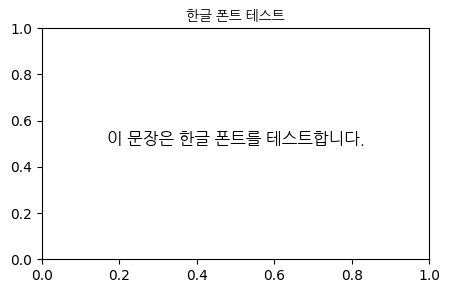

In [ ]:
import matplotlib.pyplot as plt

# 한글 폰트 테스트
plt.figure(figsize=(5, 3))
plt.title("한글 폰트 테스트", fontproperties=korean_font)
plt.text(0.5, 0.5, "이 문장은 한글 폰트를 테스트합니다.", ha="center", fontproperties=korean_font, fontsize=12)
plt.show()

In [ ]:
korean_font = set_korean_font()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

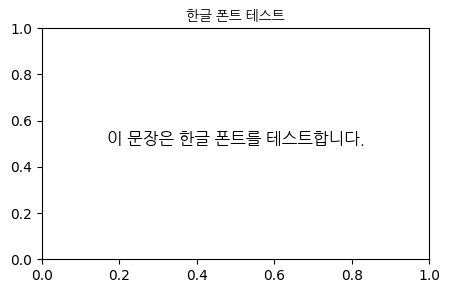

In [ ]:
# 한글 폰트 설치 및 캐시 삭제
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

# 필요한 라이브러리 임포트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 함수
def set_korean_font():
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔고딕 폰트 경로
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())  # matplotlib에 기본 폰트로 설정
    return font_prop

# 한글 폰트 적용
korean_font = set_korean_font()

# 한글 폰트 테스트
plt.figure(figsize=(5, 3))
plt.title("한글 폰트 테스트", fontproperties=korean_font)
plt.text(0.5, 0.5, "이 문장은 한글 폰트를 테스트합니다.", ha="center", fontproperties=korean_font, fontsize=12)
plt.show()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

<ipython-input-9-ee7e345d9f59>:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(group_by_column).sum().reset_index()


TypeError: argument should be a bytes-like object or ASCII string, not 'NoneType'

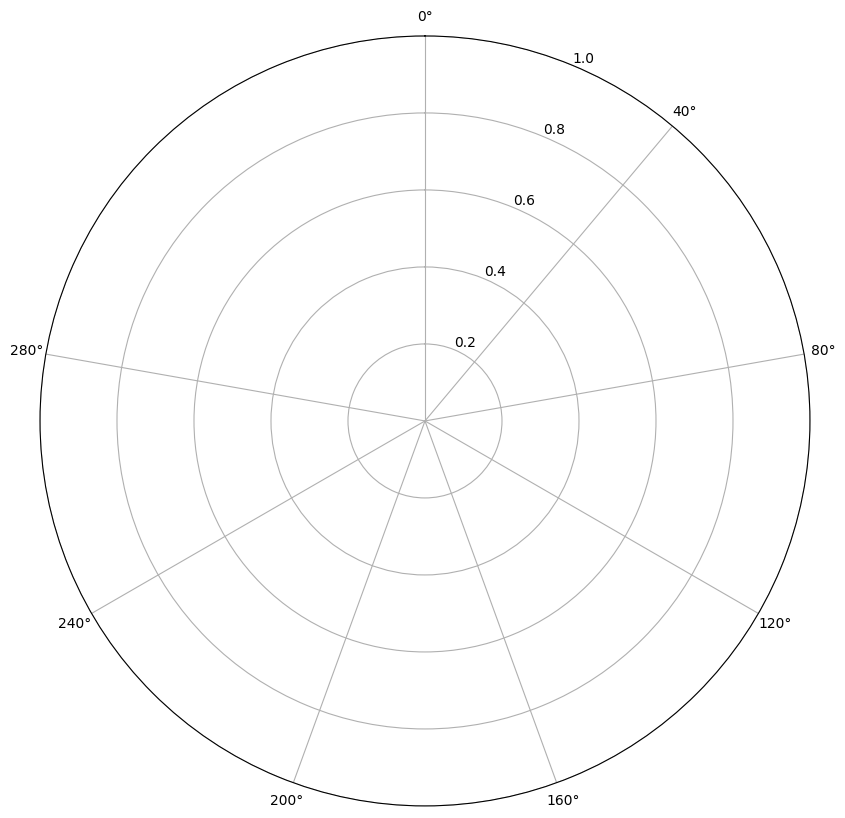

In [ ]:
# 한글 폰트 설치 및 캐시 삭제
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

# 필요한 라이브러리 임포트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import io
import base64

# 한글 폰트 설정 함수
def set_korean_font():
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔고딕 폰트 경로
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())  # matplotlib에 기본 폰트로 설정
    return font_prop

# 한글 폰트 적용
korean_font = set_korean_font()

# 데이터 전처리 함수
def preprocess_data(data, group_by_column, value_column):
    # 지사 이름 간소화
    data[group_by_column] = data[group_by_column].str.replace("지사", "")

    # 금액 변환 (₩ 단위 제거 및 천 원 단위로 변환)
    if value_column in data.columns:
        data[value_column] = (
            data[value_column]
            .replace('[₩,]', '', regex=True)
            .replace('', '0')  # 빈 값은 0으로 대체
            .astype(float) / 1000  # 천 원 단위로 변환
        )

    # NaN 값 제거
    data = data.dropna(subset=[group_by_column, value_column])

    # 관리지사 정렬 순서 지정
    sort_order = ["중앙", "강북", "서대문", "고양", "의정부", "남양주", "원주", "강릉"]
    data[group_by_column] = pd.Categorical(data[group_by_column], categories=sort_order, ordered=True)
    return data.sort_values(group_by_column)

# 방사형 차트 생성 함수
def create_dual_radar_chart(data, group_by_column, primary_column, secondary_column, chart_title):
    try:
        # 그룹화 및 데이터 준비
        grouped_data = data.groupby(group_by_column).sum().reset_index()
        categories = grouped_data[group_by_column].tolist()
        primary_values = grouped_data[primary_column].tolist()
        secondary_values = grouped_data[secondary_column].tolist()

        # 데이터 닫기 (방사형 차트를 위해)
        primary_values += primary_values[:1]
        secondary_values += secondary_values[:1]
        categories += categories[:1]

        # 각도 계산
        angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

        # 차트 그리기
        fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)

        # 축 및 그리드 설정
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontproperties=korean_font, fontsize=12)
        ax.set_yticks([])
        ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

        # 월정료 (진하게 표시)
        ax.plot(angles, primary_values, linewidth=2, linestyle='solid', color='blue', marker='o', label='월정료')
        ax.fill(angles, primary_values, color='blue', alpha=0.2)

        # 체납금액 (흐릿하게 표시)
        ax.plot(angles, secondary_values, linewidth=1, linestyle='dashed', color='red', marker='x', label='체납금액')
        ax.fill(angles, secondary_values, color='red', alpha=0.1)

        # 값 라벨 표시
        for angle, primary, secondary in zip(angles, primary_values[:-1], secondary_values[:-1]):
            ax.text(angle, primary + max(primary_values) * 0.05, f"{int(primary):,}", ha='center', va='center',
                    fontproperties=korean_font, fontsize=10, color='blue')
            ax.text(angle, secondary + max(secondary_values) * 0.05, f"{int(secondary):,}", ha='center', va='center',
                    fontproperties=korean_font, fontsize=8, color='red')

        # 차트 제목
        ax.set_title(chart_title, fontproperties=korean_font, fontsize=16, pad=30)

        # 범례 추가
        ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), prop=korean_font)

        plt.tight_layout()

        # 차트 저장 및 Base64 변환
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=150)  # 해상도 향상
        buf.seek(0)
        base64_image = base64.b64encode(buf.read()).decode('utf-8')
        buf.close()
        plt.close()

        return base64_image
    except Exception as e:
        print(f"방사형 차트 생성 오류 ({chart_title}): {e}")
        return None

# 데이터 생성 (샘플 데이터)
data = pd.DataFrame({
    '관리지사명': ['중앙지사', '강북지사', '서대문지사', '고양지사', '의정부지사', '남양주지사', '원주지사', '강릉지사'],
    'KTT월정료': [50000, 40000, 30000, 35000, 28000, 32000, 45000, 38000],
    '체납금액': [10000, 8000, 5000, 7000, 4000, 3000, 6000, 2000]
})

# 데이터 전처리
data = preprocess_data(data, '관리지사명', 'KTT월정료')
data = preprocess_data(data, '관리지사명', '체납금액')

# 방사형 차트 생성
chart_image = create_dual_radar_chart(data, '관리지사명', 'KTT월정료', '체납금액', '관리지사별 월정료와 체납금액 비교')

# 결과 확인 (이미지 출력)
from IPython.display import Image, display
with open("chart.png", "wb") as f:
    f.write(base64.b64decode(chart_image))
display(Image("chart.png"))

In [ ]:
print(data.head())
print(data.columns)

  관리지사명  KTT월정료  체납금액
0    중앙    50.0  10.0
1    강북    40.0   8.0
2   서대문    30.0   5.0
3    고양    35.0   7.0
4   의정부    28.0   4.0
Index(['관리지사명', 'KTT월정료', '체납금액'], dtype='object')


In [ ]:
def create_dual_radar_chart(data, group_by_column, primary_column, secondary_column, chart_title):
    try:
        # 그룹화 및 데이터 준비
        grouped_data = data.groupby(group_by_column).sum().reset_index()
        categories = grouped_data[group_by_column].tolist()
        primary_values = grouped_data[primary_column].tolist()
        secondary_values = grouped_data[secondary_column].tolist()

        # 데이터 길이 확인
        if len(categories) != len(primary_values) or len(categories) != len(secondary_values):
            raise ValueError("데이터 길이가 일치하지 않습니다.")

        # 데이터 닫기 (방사형 차트를 위해)
        primary_values += primary_values[:1]
        secondary_values += secondary_values[:1]
        categories += categories[:1]

        # 각도 계산
        angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

        # 차트 그리기
        fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)

        # 축 및 그리드 설정
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontproperties=korean_font, fontsize=12)
        ax.set_yticks([])
        ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

        # 월정료 (진하게 표시)
        ax.plot(angles, primary_values, linewidth=2, linestyle='solid', color='blue', marker='o', label='월정료')
        ax.fill(angles, primary_values, color='blue', alpha=0.2)

        # 체납금액 (흐릿하게 표시)
        ax.plot(angles, secondary_values, linewidth=1, linestyle='dashed', color='red', marker='x', label='체납금액')
        ax.fill(angles, secondary_values, color='red', alpha=0.1)

        # 값 라벨 표시
        for angle, primary, secondary in zip(angles, primary_values[:-1], secondary_values[:-1]):
            ax.text(angle, primary + max(primary_values) * 0.05, f"{int(primary):,}", ha='center', va='center',
                    fontproperties=korean_font, fontsize=10, color='blue')
            ax.text(angle, secondary + max(secondary_values) * 0.05, f"{int(secondary):,}", ha='center', va='center',
                    fontproperties=korean_font, fontsize=8, color='red')

        # 차트 제목
        ax.set_title(chart_title, fontproperties=korean_font, fontsize=16, pad=30)

        # 범례 추가
        ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), prop=korean_font)

        plt.tight_layout()

        # 차트 저장 및 Base64 변환
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=150)  # 해상도 향상
        buf.seek(0)
        base64_image = base64.b64encode(buf.read()).decode('utf-8')
        buf.close()
        plt.close()

        return base64_image
    except Exception as e:
        print(f"방사형 차트 생성 오류 ({chart_title}): {e}")
        return None

# 디버깅용 데이터 확인
print(data.head())  # 데이터 구조 확인

  관리지사명  KTT월정료  체납금액
0    중앙    50.0  10.0
1    강북    40.0   8.0
2   서대문    30.0   5.0
3    고양    35.0   7.0
4   의정부    28.0   4.0


방사형 차트 생성 오류 (관리지사별 월정료와 체납금액 비교): The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (6).


TypeError: argument should be a bytes-like object or ASCII string, not 'NoneType'

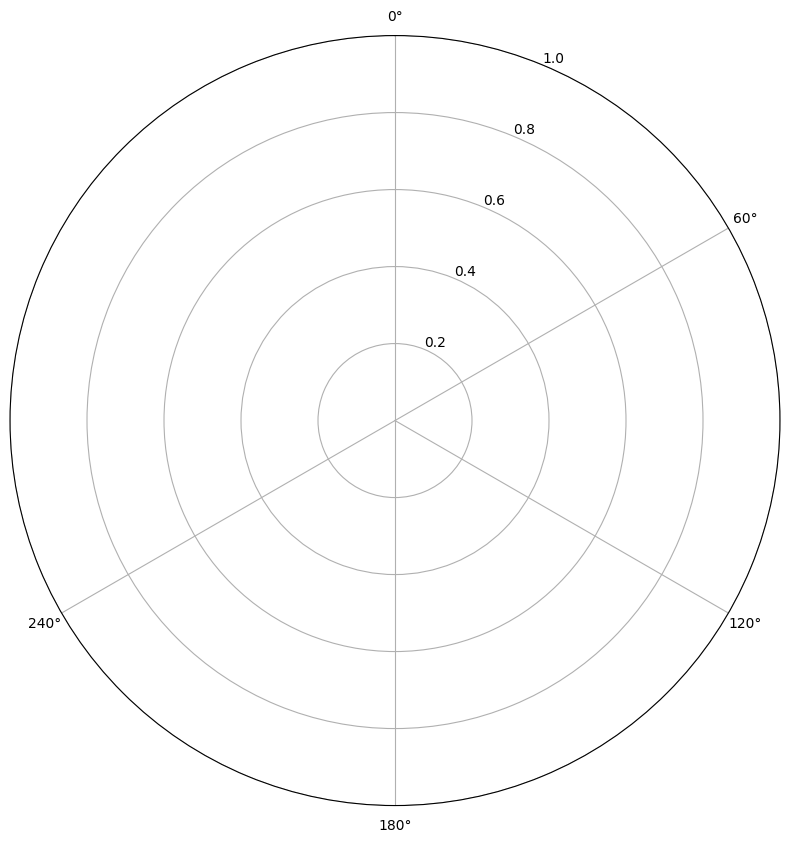

In [ ]:
# 필요한 라이브러리 임포트
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
import base64
import matplotlib.font_manager as fm

# 한글 폰트 설정
def set_korean_font():
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔고딕 폰트 경로
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())  # matplotlib에 기본 폰트로 설정
    return font_prop

korean_font = set_korean_font()

# 방사형 차트 생성 함수
def create_dual_radar_chart(data, group_by_column, primary_column, secondary_column, chart_title):
    try:
        # 데이터 준비
        categories = data[group_by_column].tolist()
        primary_values = data[primary_column].tolist()
        secondary_values = data[secondary_column].tolist()

        # 데이터 닫기 (방사형 차트를 위해)
        primary_values += primary_values[:1]
        secondary_values += secondary_values[:1]
        categories += categories[:1]

        # 각도 계산
        angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

        # 차트 그리기
        fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
        ax.set_theta_offset(np.pi / 2)
        ax.set_theta_direction(-1)

        # 축 및 그리드 설정
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontproperties=korean_font, fontsize=12)
        ax.set_yticks([])
        ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

        # 월정료 (진하게 표시)
        ax.plot(angles, primary_values, linewidth=2, linestyle='solid', color='blue', marker='o', label='월정료')
        ax.fill(angles, primary_values, color='blue', alpha=0.2)

        # 체납금액 (흐릿하게 표시)
        ax.plot(angles, secondary_values, linewidth=1, linestyle='dashed', color='red', marker='x', label='체납금액')
        ax.fill(angles, secondary_values, color='red', alpha=0.1)

        # 값 라벨 표시
        for angle, primary, secondary in zip(angles, primary_values[:-1], secondary_values[:-1]):
            ax.text(angle, primary + max(primary_values) * 0.05, f"{primary:.1f}", ha='center', va='center',
                    fontproperties=korean_font, fontsize=10, color='blue')
            ax.text(angle, secondary + max(secondary_values) * 0.05, f"{secondary:.1f}", ha='center', va='center',
                    fontproperties=korean_font, fontsize=8, color='red')

        # 차트 제목
        ax.set_title(chart_title, fontproperties=korean_font, fontsize=16, pad=30)

        # 범례 추가
        ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), prop=korean_font)

        plt.tight_layout()

        # 차트 저장 및 Base64 변환
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=150)  # 해상도 향상
        buf.seek(0)
        base64_image = base64.b64encode(buf.read()).decode('utf-8')
        buf.close()
        plt.close()

        return base64_image
    except Exception as e:
        print(f"방사형 차트 생성 오류 ({chart_title}): {e}")
        return None

# 데이터
data = pd.DataFrame({
    '관리지사명': ['중앙', '강북', '서대문', '고양', '의정부'],
    'KTT월정료': [50.0, 40.0, 30.0, 35.0, 28.0],
    '체납금액': [10.0, 8.0, 5.0, 7.0, 4.0]
})

# 방사형 차트 생성
chart_image = create_dual_radar_chart(data, '관리지사명', 'KTT월정료', '체납금액', '관리지사별 월정료와 체납금액 비교')

# 결과 확인 (이미지 출력)
from IPython.display import Image, display
with open("chart.png", "wb") as f:
    f.write(base64.b64decode(chart_image))
display(Image("chart.png"))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
/content/drive/My Drive/Key/credentials.json

NameError: name 'content' is not defined

In [ ]:
# 필요한 라이브러리 설치
!apt-get update -qq
!apt-get install -qq fonts-nanum
!pip install --upgrade matplotlib pandas gspread oauth2client google-api-python-client

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import io
import base64
import matplotlib.font_manager as fm

# 한글 폰트 설정
def set_korean_font():
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
    return font_prop

korean_font = set_korean_font()

# Google Sheets 인증 및 데이터 가져오기
def get_spreadsheet_data(spreadsheet_id, sheet_name):
    scope = [
        'https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive',
    ]
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', scope)
    client = gspread.authorize(creds)
    sheet = client.open_by_key(spreadsheet_id).worksheet(sheet_name)
    data = sheet.get_all_records()
    return pd.DataFrame(data)

# 3D 방사형 차트 생성
def create_3d_radar_chart(data, group_by_column, primary_column, secondary_column, chart_title):
    try:
        # 데이터 정리
        categories = data[group_by_column].tolist()
        primary_values = data[primary_column].tolist()
        secondary_values = data[secondary_column].tolist()

        # 데이터 닫기 (방사형 차트용)
        primary_values += primary_values[:1]
        secondary_values += secondary_values[:1]
        categories += categories[:1]

        # 각도 계산
        angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
        angles += angles[:1]

        # 3D 차트 생성
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')

        # 축 설정
        ax.plot(angles, primary_values, zs=0, zdir='z', label='월정료', color='blue')
        ax.plot(angles, secondary_values, zs=1, zdir='z', label='체납금액', color='red')
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontproperties=korean_font, fontsize=10)
        ax.set_yticks([])
        ax.set_zlabel('값 (천 원)', fontproperties=korean_font, fontsize=12)
        ax.set_title(chart_title, fontproperties=korean_font, fontsize=16)

        # 범례 추가
        ax.legend(loc='upper right', prop=korean_font)

        # 저장
        plt.tight_layout()
        plt.savefig("chart_3d.png", dpi=150)
        plt.show()

    except Exception as e:
        print(f"3D 방사형 차트 생성 오류 ({chart_title}): {e}")

# 실행
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'
sheet_name = 'db'

# 데이터 가져오기
data = get_spreadsheet_data(spreadsheet_id, sheet_name)

# 데이터 전처리
data['KTT월정료'] = data['KTT월정료'].replace('[₩,]', '', regex=True).astype(float) / 1000  # 천 원 단위 변환
data['체납금액'] = data['체납금액'].replace('[₩,]', '', regex=True).astype(float) / 1000  # 천 원 단위 변환

# 3D 방사형 차트 생성
create_3d_radar_chart(data, '관리지사명', 'KTT월정료', '체납금액', '관리지사별 월정료와 체납금액 비교 (3D)')

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.0 MB/s eta 0:00:00
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.155.0
    Uninstalling google-api-python-client-2.155.0:
      Successfully uninstalled google-api-python-client-2.155.0


ValueError: could not convert string to float: ''

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


3D 방사형 차트 생성 오류 (관리지사별 월정료와 체납금액 비교 (3D)): x and y must have same first dimension, but have shapes (876,) and (875,)


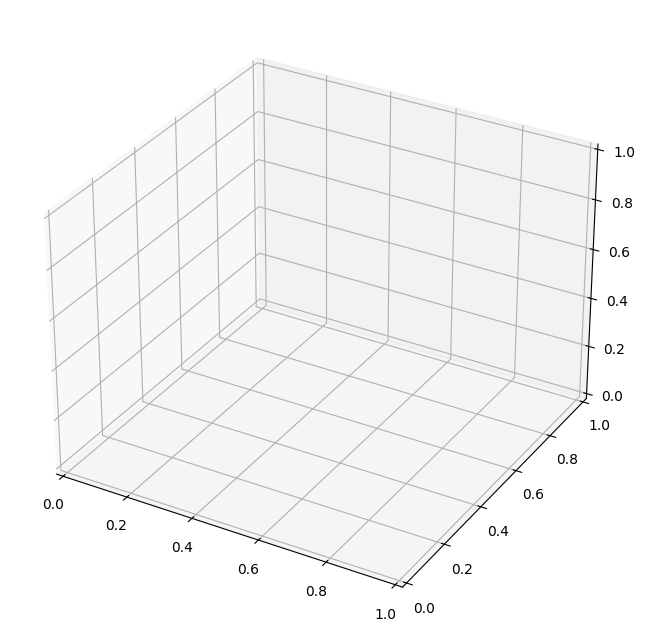

In [ ]:
# 필요한 라이브러리 설치
!apt-get update -qq
!apt-get install -qq fonts-nanum
!pip install --upgrade matplotlib pandas gspread oauth2client google-api-python-client

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import io
import base64
import matplotlib.font_manager as fm

# 한글 폰트 설정
def set_korean_font():
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())
    return font_prop

korean_font = set_korean_font()

# Google Sheets 인증 및 데이터 가져오기
def get_spreadsheet_data(spreadsheet_id, sheet_name):
    scope = [
        'https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive',
    ]
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', scope)
    client = gspread.authorize(creds)
    sheet = client.open_by_key(spreadsheet_id).worksheet(sheet_name)
    data = sheet.get_all_records()
    return pd.DataFrame(data)

# 데이터 전처리
def preprocess_column(data, column_name):
    data[column_name] = (
        data[column_name]
        .replace('[₩,]', '', regex=True)  # 특수 문자 제거
        .replace('', '0')  # 빈 값은 0으로 대체
        .astype(float) / 1000  # 천 원 단위 변환
    )
    return data

# 3D 방사형 차트 생성
def create_3d_radar_chart(data, group_by_column, primary_column, secondary_column, chart_title):
    try:
        # 데이터 정리
        categories = data[group_by_column].tolist()
        primary_values = data[primary_column].tolist()
        secondary_values = data[secondary_column].tolist()

        # 데이터 닫기 (방사형 차트용)
        primary_values += primary_values[:1]
        secondary_values += secondary_values[:1]
        categories += categories[:1]

        # 각도 계산
        angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
        angles += angles[:1]

        # 3D 차트 생성
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')

        # 축 설정
        ax.plot(angles, primary_values, zs=0, zdir='z', label='월정료', color='blue')
        ax.plot(angles, secondary_values, zs=1, zdir='z', label='체납금액', color='red')
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontproperties=korean_font, fontsize=10)
        ax.set_yticks([])
        ax.set_zlabel('값 (천 원)', fontproperties=korean_font, fontsize=12)
        ax.set_title(chart_title, fontproperties=korean_font, fontsize=16)

        # 범례 추가
        ax.legend(loc='upper right', prop=korean_font)

        # 저장
        plt.tight_layout()
        plt.savefig("chart_3d.png", dpi=150)
        plt.show()

    except Exception as e:
        print(f"3D 방사형 차트 생성 오류 ({chart_title}): {e}")

# 실행
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'
sheet_name = 'db'

# 데이터 가져오기
data = get_spreadsheet_data(spreadsheet_id, sheet_name)

# 데이터 전처리
data = preprocess_column(data, 'KTT월정료')
data = preprocess_column(data, '체납금액')

# 3D 방사형 차트 생성
create_3d_radar_chart(data, '관리지사명', 'KTT월정료', '체납금액', '관리지사별 월정료와 체납금액 비교 (3D)')

In [ ]:
print(data.head())
print(data.info())

   관리지사명 실적채널  영업자      청구번호      계약번호     서비스번호                       서비스(소)  \
0  의정부지사   SP  노승진  42000596  51852000  62757317  GiGAeyes i-slim (ktt)(2210)   
1  의정부지사   SP  박헌석  41676103  51552219  62117152              GiGAeyes i-slim   
2   강북지사   SP  민유기  42051446  51898954  62858083             GiGAeyes i-guard   
3  의정부지사   SP  정성록  42332520  52161841                            단독형 II 지문리더   
4   강북지사   SP  최선혜  41775730  51644679  62318068        GiGAeyes i-slim (ktt)   

  BM                     상호  서비스상태(대)  ...   체납금액  KPI점수 반영시설   영업구역정보 무인매장구분  \
0                    판다네탕후루  직권정지(체납)  ...   0.00              G000503          
1                     이마트24  직권정지(체납)  ...  12.01              G000501          
2     아라치(GiGAeyes i-guard)  직권정지(체납)  ...  89.10              G000104   유인매장   
3                    비즈원플러스        정지  ...   0.00              G000501   유인매장   
4                      스윗가든        정지  ...   0.00              G000105          

  담당자            휴대폰      

ValueError: x and y must have same first dimension, but have shapes (7,) and (6,)

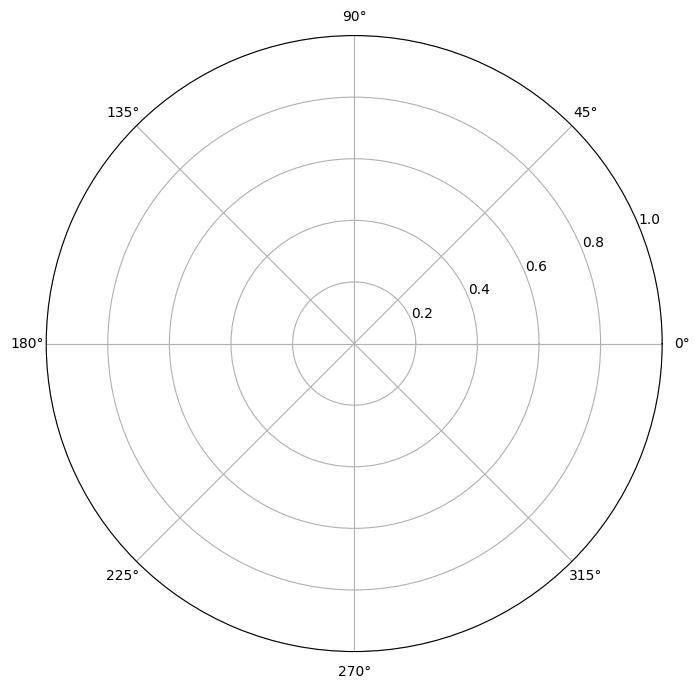

In [ ]:
import matplotlib.pyplot as plt
from math import pi
import pandas as pd

# 데이터 준비 (데이터는 이미 로드됨)
data = pd.DataFrame({
    '관리지사명': ['의정부', '강북', '서대문', '고양', '의정부'],
    'KTT월정료': [50.0, 40.0, 30.0, 35.0, 28.0],
    '체납금액': [10.0, 8.0, 5.0, 7.0, 4.0]
})

# 데이터 전처리
data['KTT월정료'] = data['KTT월정료'] / 1000  # 천 원 단위 변환
data['체납금액'] = data['체납금액'] / 1000  # 천 원 단위 변환

# 방사형 차트 데이터 준비
categories = list(data['관리지사명'])
values1 = list(data['KTT월정료'])
values2 = list(data['체납금액'])

# 방사형 데이터 연결 (마지막 값 연결하여 닫기)
values1 += values1[:1]
values2 += values2[:1]
categories += categories[:1]

# 각도를 계산
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

# 방사형 차트 생성
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 첫 번째 데이터 (진하게)
ax.plot(angles, values1, linewidth=2, linestyle='solid', label='KTT월정료', color='blue')
ax.fill(angles, values1, color='blue', alpha=0.4)

# 두 번째 데이터 (흐리게)
ax.plot(angles, values2, linewidth=2, linestyle='dashed', label='체납금액', color='red')
ax.fill(angles, values2, color='red', alpha=0.2)

# 카테고리 설정
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)

# 레이블 추가
ax.set_rlabel_position(0)
ax.set_yticks([1, 2, 3, 4, 5])  # y축 레이블 값
ax.set_yticklabels(['1', '2', '3', '4', '5'], fontsize=10)
ax.set_ylim(0, max(max(values1), max(values2)) + 1)

# 제목과 범례 추가
plt.title('관리지사별 KTT월정료와 체납금액 비교', size=16, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

# 결과 출력
plt.tight_layout()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (7,) and (6,)

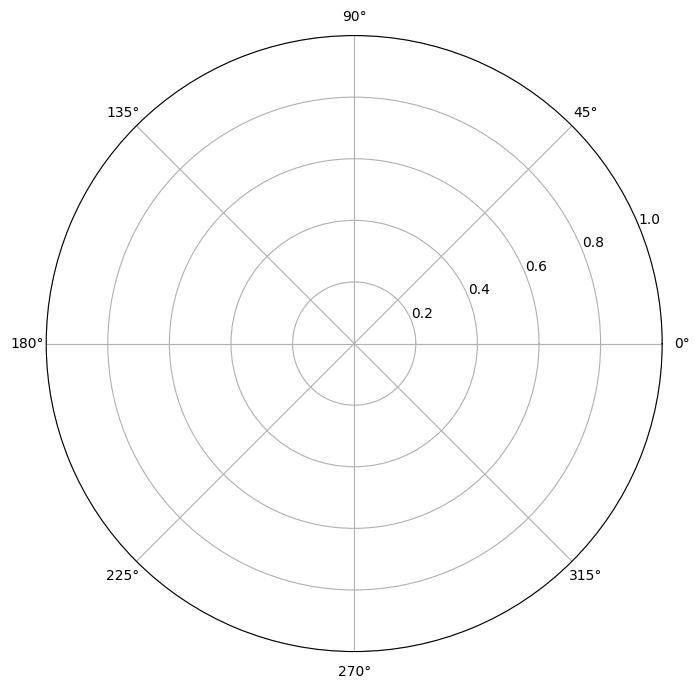

In [ ]:
import matplotlib.pyplot as plt
from math import pi
import pandas as pd

# 데이터 준비
data = pd.DataFrame({
    '관리지사명': ['의정부', '강북', '서대문', '고양', '의정부'],
    'KTT월정료': [50.0, 40.0, 30.0, 35.0, 28.0],
    '체납금액': [10.0, 8.0, 5.0, 7.0, 4.0]
})

# 데이터 전처리
data['KTT월정료'] = data['KTT월정료'] / 1000  # 천 원 단위 변환
data['체납금액'] = data['체납금액'] / 1000  # 천 원 단위 변환

# 방사형 차트 데이터 준비
categories = list(data['관리지사명'])
values1 = list(data['KTT월정료'])
values2 = list(data['체납금액'])

# 방사형 데이터 연결 (마지막 값 연결하여 닫기)
values1 += values1[:1]
values2 += values2[:1]
categories += categories[:1]

# 각도를 계산
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

# 방사형 차트 생성
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 첫 번째 데이터 (진하게)
ax.plot(angles, values1, linewidth=2, linestyle='solid', label='KTT월정료', color='blue')
ax.fill(angles, values1, color='blue', alpha=0.4)

# 두 번째 데이터 (흐리게)
ax.plot(angles, values2, linewidth=2, linestyle='dashed', label='체납금액', color='red')
ax.fill(angles, values2, color='red', alpha=0.2)

# 카테고리 설정
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)

# Y축 레이블 제거
ax.set_yticks([])
ax.yaxis.set_visible(False)

# 제목과 범례 추가
plt.title('관리지사별 KTT월정료와 체납금액 비교', size=16, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

# 결과 출력
plt.tight_layout()
plt.show()

In [ ]:
# 필요한 라이브러리 설치
!pip install gspread oauth2client pandas

import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# Google Sheets 인증 및 데이터 가져오기
def get_spreadsheet_data(spreadsheet_id, sheet_name):
    scope = [
        'https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive',
    ]
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', scope)
    client = gspread.authorize(creds)
    sheet = client.open_by_key(spreadsheet_id).worksheet(sheet_name)
    data = sheet.get_all_records()
    return pd.DataFrame(data)

# HTML 파일 저장 함수
def save_dataframe_as_html(dataframe, output_path='chart.html'):
    html = dataframe.to_html(index=False, justify='center', classes='table table-bordered', border=0)
    style = """
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
            padding: 0;
        }
        table {
            width: 100%;
            border-collapse: collapse;
            margin: 20px 0;
        }
        th, td {
            text-align: center;
            padding: 8px;
            border: 1px solid #ddd;
        }
        th {
            background-color: #f4f4f4;
            font-weight: bold;
        }
        tr:nth-child(even) {
            background-color: #f9f9f9;
        }
        tr:hover {
            background-color: #f1f1f1;
        }
    </style>
    """
    html_content = f"<html><head>{style}</head><body><h1>차트 데이터</h1>{html}</body></html>"
    with open(output_path, 'w', encoding='utf-8') as f:
        f.write(html_content)
    print(f"HTML 파일 저장 완료: {output_path}")
    return output_path

# 실행
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'  # 스프레드시트 ID 입력
sheet_name = '차트'  # 시트 이름 입력

# 데이터 가져오기
data = get_spreadsheet_data(spreadsheet_id, sheet_name)

# HTML 파일 생성
html_file_path = save_dataframe_as_html(data)

# 결과 확인
from IPython.display import display, HTML
with open(html_file_path, 'r', encoding='utf-8') as file:
    display(HTML(file.read()))

HTML 파일 저장 완료: chart.html


In [ ]:
# 필요한 라이브러리 설치
!pip install gspread oauth2client pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import io
import base64

# Google Sheets 인증 및 데이터 가져오기
def get_spreadsheet_data(spreadsheet_id, sheet_name):
    scope = [
        'https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive',
    ]
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', scope)
    client = gspread.authorize(creds)
    sheet = client.open_by_key(spreadsheet_id).worksheet(sheet_name)
    data = sheet.get_all_records()
    return pd.DataFrame(data)

# 차트 생성 함수
def create_chart(data, x_column, y_column, chart_title):
    plt.figure(figsize=(10, 6))
    plt.bar(data[x_column], data[y_column], color='skyblue')
    plt.title(chart_title, fontsize=16)
    plt.xlabel(x_column, fontsize=12)
    plt.ylabel(y_column, fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # 차트를 Base64로 변환
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    base64_image = base64.b64encode(buf.read()).decode('utf-8')
    buf.close()
    plt.close()
    return base64_image

# HTML 파일 생성 함수
def save_charts_as_html(chart_images, output_path='charts.html'):
    html = "<html><body><h1>차트 목록</h1>"
    for i, chart in enumerate(chart_images):
        html += f'<h2>차트 {i+1}</h2>'
        html += f'<img src="data:image/png;base64,{chart}" style="max-width: 600px; height: auto; display: block; margin-bottom: 20px;" />'
    html += "</body></html>"
    with open(output_path, 'w', encoding='utf-8') as f:
        f.write(html)
    print(f"HTML 파일 저장 완료: {output_path}")
    return output_path

# 실행
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'  # 스프레드시트 ID 입력
sheet_name = '차트'  # 시트 이름 입력

# 데이터 가져오기
data = get_spreadsheet_data(spreadsheet_id, sheet_name)

# 필요한 차트 데이터로 변환
chart_images = []
if '관리지사명' in data.columns and '체납금액' in data.columns:
    data['체납금액'] = pd.to_numeric(data['체납금액'], errors='coerce')  # 숫자로 변환
    chart_images.append(create_chart(data, '관리지사명', '체납금액', '관리지사별 체납금액 합계'))

if '관리지사명' in data.columns and 'KTT월정료' in data.columns:
    data['KTT월정료'] = pd.to_numeric(data['KTT월정료'], errors='coerce')  # 숫자로 변환
    chart_images.append(create_chart(data, '관리지사명', 'KTT월정료', '관리지사별 KTT월정료 합계'))

# HTML 파일 생성
html_file = save_charts_as_html(chart_images)

# Colab에서 HTML 파일 미리보기
from IPython.display import display, HTML
with open(html_file, 'r', encoding='utf-8') as file:
    display(HTML(file.read()))

HTML 파일 저장 완료: charts.html


In [ ]:
# 필요한 라이브러리 설치
!apt-get update -qq
!apt-get install -qq fonts-nanum
!pip install --upgrade matplotlib pandas gspread oauth2client google-api-python-client

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
import io
import base64

# 한글 폰트 설정 함수
def set_korean_font():
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    return font_prop

korean_font = set_korean_font()

# Google Sheets 인증 및 데이터 가져오기
def get_spreadsheet_data(spreadsheet_id, sheet_name):
    scope = [
        'https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive',
    ]
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', scope)
    client = gspread.authorize(creds)
    sheet = client.open_by_key(spreadsheet_id).worksheet(sheet_name)
    data = sheet.get_all_records()
    return pd.DataFrame(data)

# 차트 생성 함수
def create_chart(data, x_column, y_column, title):
    try:
        # 데이터 정리 및 변환
        data[y_column] = data[y_column].replace('[₩,]', '', regex=True).astype(float) / 1000  # 천 원 단위 변환
        grouped_data = data.groupby(x_column)[y_column].sum().reset_index()

        # 차트 생성
        plt.figure(figsize=(10, 6))
        plt.bar(grouped_data[x_column], grouped_data[y_column], color='skyblue')
        plt.title(title, fontproperties=korean_font, fontsize=14)
        plt.xlabel(x_column, fontproperties=korean_font, fontsize=12)
        plt.ylabel(f"{y_column} (천 원)", fontproperties=korean_font, fontsize=12)
        plt.xticks(fontproperties=korean_font, rotation=45)
        plt.tight_layout()

        # 이미지로 변환
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        base64_image = base64.b64encode(buf.read()).decode('utf-8')
        buf.close()
        plt.close()
        return base64_image
    except Exception as e:
        print(f"차트 생성 오류: {e}")
        return None

# HTML 파일 저장 함수
def save_charts_as_html(chart_images, output_path='charts.html'):
    html = "<html><body><h1>차트 목록</h1>"
    for i, chart in enumerate(chart_images):
        if chart:
            html += f'<h2>차트 {i+1}</h2>'
            html += f'<img src="data:image/png;base64,{chart}" style="max-width: 600px; height: auto; display: block; margin-bottom: 20px;" />'
        else:
            html += f"<p>차트 {i+1} 생성 실패</p>"
    html += "</body></html>"
    with open(output_path, 'w', encoding='utf-8') as f:
        f.write(html)
    print(f"HTML 파일 저장 완료: {output_path}")
    return output_path

# Google Drive에 파일 업로드 및 링크 생성
def upload_to_google_drive(file_path):
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', [
        'https://www.googleapis.com/auth/drive'
    ])
    drive_service = build('drive', 'v3', credentials=creds)

    file_metadata = {
        'name': file_path.split('/')[-1],
        'mimeType': 'text/html'
    }
    media = MediaFileUpload(file_path, mimetype='text/html')
    uploaded_file = drive_service.files().create(
        body=file_metadata,
        media_body=media,
        fields='id'
    ).execute()

    file_id = uploaded_file.get('id')

    # 링크 공유 설정
    drive_service.permissions().create(
        fileId=file_id,
        body={'type': 'anyone', 'role': 'reader'},
    ).execute()

    share_link = f"https://drive.google.com/file/d/{file_id}/view"
    print(f"파일 링크 생성 완료: {share_link}")
    return share_link

# 실행
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'  # 스프레드시트 ID
sheet_name = '차트'  # 시트 이름
data = get_spreadsheet_data(spreadsheet_id, sheet_name)

# 차트 생성 및 HTML 저장
chart_images = []
chart_images.append(create_chart(data, '관리지사명', '체납금액', '관리지사명별 체납금액 합계'))
chart_images.append(create_chart(data, '관리지사명', 'KTT월정료', '관리지사명별 KTT월정료 합계'))

html_file = save_charts_as_html(chart_images)
share_link = upload_to_google_drive(html_file)

print(f"차트를 확인하려면 다음 링크를 클릭하세요: {share_link}")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
차트 생성 오류: '체납금액'
차트 생성 오류: 'KTT월정료'
HTML 파일 저장 완료: charts.html
파일 링크 생성 완료: https://drive.google.com/file/d/18PxzB9BokVBOGqHOqmoFzniNNEV3NSV6/view
차트를 확인하려면 다음 링크를 클릭하세요: https://drive.google.com/file/d/18PxzB9BokVBOGqHOqmoFzniNNEV3NSV6/view


In [ ]:
# Google 스프레드시트에서 데이터 가져오기
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'  # 스프레드시트 ID
sheet_name = 'db'  # 시트 이름

def get_spreadsheet_data(spreadsheet_id, sheet_name):
    scope = [
        'https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive',
    ]
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', scope)
    client = gspread.authorize(creds)
    sheet = client.open_by_key(spreadsheet_id).worksheet(sheet_name)
    data = sheet.get_all_records()
    return pd.DataFrame(data)

# 데이터 로드
try:
    data = get_spreadsheet_data(spreadsheet_id, sheet_name)
    print("데이터 로드 성공")
    print(data.head())
except Exception as e:
    print(f"데이터 로드 실패: {e}")

데이터 로드 성공
   관리지사명 실적채널  영업자      청구번호      계약번호     서비스번호                       서비스(소)  \
0  의정부지사   SP  노승진  42000596  51852000  62757317  GiGAeyes i-slim (ktt)(2210)   
1  의정부지사   SP  박헌석  41676103  51552219  62117152              GiGAeyes i-slim   
2   강북지사   SP  민유기  42051446  51898954  62858083             GiGAeyes i-guard   
3  의정부지사   SP  정성록  42332520  52161841                            단독형 II 지문리더   
4   강북지사   SP  최선혜  41775730  51644679  62318068        GiGAeyes i-slim (ktt)   

  BM                     상호  서비스상태(대)  ...     체납금액 KPI점수 반영시설   영업구역정보  \
0                    판다네탕후루  직권정지(체납)  ...       ₩0             G000503   
1                     이마트24  직권정지(체납)  ...  ₩12,010             G000501   
2     아라치(GiGAeyes i-guard)  직권정지(체납)  ...  ₩89,100             G000104   
3                    비즈원플러스        정지  ...                      G000501   
4                      스윗가든        정지  ...                      G000105   

  무인매장구분 담당자            휴대폰               최종해제일시    

In [1]:
# 필요한 라이브러리 설치
!apt-get update -qq
!apt-get install -qq fonts-nanum
!pip install --upgrade matplotlib pandas gspread oauth2client google-api-python-client

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import io
import base64

# 한글 폰트 설정 함수
def set_korean_font():
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    font_prop = fm.FontProperties(fname=font_path)
    return font_prop

korean_font = set_korean_font()

# Google 스프레드시트에서 데이터 가져오기
def get_spreadsheet_data(spreadsheet_id, sheet_name):
    scope = [
        'https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive',
    ]
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', scope)
    client = gspread.authorize(creds)
    sheet = client.open_by_key(spreadsheet_id).worksheet(sheet_name)
    data = sheet.get_all_records()
    return pd.DataFrame(data)

# 데이터 전처리
def preprocess_data(data, column_name):
    data[column_name] = (
        data[column_name]
        .replace('[₩,]', '', regex=True)  # 통화 및 쉼표 제거
        .replace('', '0')  # 빈 문자열을 0으로 대체
        .fillna('0')  # NaN 값을 0으로 대체
        .astype(float)  # 숫자로 변환
    )
    return data

# 차트 생성 함수
def create_chart(data, group_by_column, value_column, chart_title):
    try:
        grouped_data = data.groupby(group_by_column)[value_column].sum().reset_index()

        plt.figure(figsize=(10, 6))
        bars = plt.bar(grouped_data[group_by_column], grouped_data[value_column])

        plt.title(chart_title, fontproperties=korean_font, fontsize=14)
        plt.xticks(fontproperties=korean_font, rotation=45)
        plt.yticks(fontproperties=korean_font)

        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{int(yval):,}", ha='center', va='bottom', fontproperties=korean_font, fontsize=10)

        buf = io.BytesIO()
        plt.savefig(buf, format='png', bbox_inches='tight')
        buf.seek(0)
        base64_image = base64.b64encode(buf.read()).decode('utf-8')
        buf.close()
        plt.close()

        return base64_image
    except Exception as e:
        print(f"차트 생성 오류: {e}")
        return None

# HTML 파일 저장 함수
def save_charts_as_html(chart_images, output_path='charts.html'):
    html = "<html><body><h1>차트 목록</h1>"
    for i, chart in enumerate(chart_images):
        if chart:
            html += f'<h2>차트 {i+1}</h2>'
            html += f'<img src="data:image/png;base64,{chart}" style="max-width: 800px; display: block; margin-bottom: 20px;" />'
        else:
            html += f"<p>차트 {i+1} 생성 실패</p>"
    html += "</body></html>"

    with open(output_path, 'w', encoding='utf-8') as f:
        f.write(html)
    print(f"HTML 파일 저장 완료: {output_path}")
    return output_path

# 실행
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'
sheet_name = 'db'

data = get_spreadsheet_data(spreadsheet_id, sheet_name)

# 데이터 전처리
data = preprocess_data(data, '체납금액')
data = preprocess_data(data, 'KTT월정료')

# 차트 생성 및 HTML 저장
chart_images = []
chart_images.append(create_chart(data, '관리지사명', '체납금액', '관리지사명별 체납금액 (단위: 원)'))
chart_images.append(create_chart(data, '관리지사명', 'KTT월정료', '관리지사명별 KTT월정료 (단위: 원)'))

html_file_path = save_charts_as_html(chart_images)

print(f"HTML 파일 저장 완료. 파일 경로: {html_file_path}")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 64.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-pytho

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Key/credentials.json'

In [ ]:
from google.colab import files
files.download('charts.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 필요한 라이브러리 설치
!pip install gspread oauth2client pandas

import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# Google 스프레드시트 데이터 가져오기 함수
def get_spreadsheet_data(spreadsheet_id, sheet_name):
    scope = [
        'https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive',
    ]
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', scope)
    client = gspread.authorize(creds)
    sheet = client.open_by_key(spreadsheet_id).worksheet(sheet_name)
    data = sheet.get_all_records()  # 데이터 가져오기
    return pd.DataFrame(data)  # DataFrame으로 변환

# HTML 저장 함수
def save_dataframe_as_html(dataframe, output_path='sheet_data.html'):
    html = dataframe.to_html(index=False, justify='center', classes='table table-bordered', border=0)
    style = """
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
        }
        table {
            width: 100%;
            border-collapse: collapse;
            margin: 20px 0;
        }
        th, td {
            text-align: center;
            padding: 8px;
            border: 1px solid #ddd;
        }
        th {
            background-color: #f4f4f4;
            font-weight: bold;
        }
        tr:nth-child(even) {
            background-color: #f9f9f9;
        }
        tr:hover {
            background-color: #f1f1f1;
        }
    </style>
    """
    html_content = f"<html><head>{style}</head><body><h1>차트 시트 데이터</h1>{html}</body></html>"
    with open(output_path, 'w', encoding='utf-8') as f:
        f.write(html_content)
    print(f"HTML 파일 저장 완료: {output_path}")
    return output_path

# 실행
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'  # 스프레드시트 ID
sheet_name = '차트'  # 시트 이름

# 스프레드시트 데이터 가져오기
data = get_spreadsheet_data(spreadsheet_id, sheet_name)

# 데이터 출력
print(data.head())  # 데이터의 첫 5줄 확인

# HTML 저장
html_file_path = save_dataframe_as_html(data)

# Colab에서 HTML 미리보기
from IPython.display import display, HTML
with open(html_file_path, 'r', encoding='utf-8') as file:
    display(HTML(file.read()))

Empty DataFrame
Columns: []
Index: []
HTML 파일 저장 완료: sheet_data.html


In [ ]:
# 필요한 라이브러리 설치
!pip install gspread oauth2client pandas

import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials

# Google 스프레드시트 데이터 가져오기 함수
def get_spreadsheet_data(spreadsheet_id, sheet_name):
    scope = [
        'https://spreadsheets.google.com/feeds',
        'https://www.googleapis.com/auth/drive',
    ]
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', scope)
    client = gspread.authorize(creds)
    sheet = client.open_by_key(spreadsheet_id).worksheet(sheet_name)
    data = sheet.get_all_records()  # 데이터 가져오기
    return pd.DataFrame(data)  # DataFrame으로 변환

# 실행
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'  # 스프레드시트 ID
sheet_name = '차트'  # 시트 이름

# 스프레드시트 데이터 가져오기
try:
    data = get_spreadsheet_data(spreadsheet_id, sheet_name)
    print("데이터 로드 성공!")
    print(data.head())  # 데이터의 첫 5줄 확인
except Exception as e:
    print(f"데이터 로드 실패: {e}")

데이터 로드 성공!
Empty DataFrame
Columns: []
Index: []


In [ ]:
sheet_name = '차트'  # '차트' 대신 정확한 시트 이름 사용

In [ ]:
function exportChartsAsHTML() {
  // 스프레드시트 및 시트 선택
  var spreadsheet = SpreadsheetApp.getActiveSpreadsheet();
  var sheet = spreadsheet.getSheetByName("차트"); // 시트 이름 확인

  // 차트 가져오기
  var charts = sheet.getCharts();
  if (!charts.length) {
    Logger.log("차트가 없습니다.");
    return;
  }

  // HTML 콘텐츠 생성
  var html = '<html><body><h1>차트 목록</h1>';
  charts.forEach(function(chart, index) {
    var imageBlob = chart.getAs('image/png');
    var base64Image = Utilities.base64Encode(imageBlob.getBytes());
    html += `<h2>차트 ${index + 1}</h2>`;
    html += `<img src="data:image/png;base64,${base64Image}" style="max-width: 600px; height: auto; display: block; margin-bottom: 20px;" />`;
  });
  html += '</body></html>';

  // HTML 파일 생성
  var file = DriveApp.createFile("charts.html", html, MimeType.HTML);
  Logger.log("HTML 파일 생성 완료: " + file.getUrl());
}

SyntaxError: invalid syntax (<ipython-input-35-ad00c4989964>, line 1)

In [ ]:
pip install gspread oauth2client matplotlib pandas

In [ ]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import matplotlib.pyplot as plt
import io
import base64

# Google Sheets 인증 및 데이터 가져오기
def get_spreadsheet_data(spreadsheet_id, sheet_name):
    scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
    creds = ServiceAccountCredentials.from_json_keyfile_name('credentials.json', scope)
    client = gspread.authorize(creds)
    sheet = client.open_by_key(spreadsheet_id).worksheet(sheet_name)
    data = pd.DataFrame(sheet.get_all_records())
    return data

# 차트 생성 및 Base64로 변환
def create_chart(data, group_by_column, value_column, chart_title):
    grouped_data = data.groupby(group_by_column)[value_column].sum().reset_index()
    plt.figure(figsize=(8, 6))
    plt.bar(grouped_data[group_by_column], grouped_data[value_column], color='skyblue')
    plt.title(chart_title, fontsize=16)
    plt.xlabel(group_by_column, fontsize=14)
    plt.ylabel(value_column, fontsize=14)
    plt.xticks(rotation=45)
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    base64_image = base64.b64encode(buf.read()).decode('utf-8')
    buf.close()
    plt.close()
    return base64_image

# HTML 파일로 저장
def save_charts_as_html(chart_images, output_path='charts.html'):
    html = "<html><body><h1>차트 목록</h1>"
    for i, chart in enumerate(chart_images):
        html += f"<h2>차트 {i+1}</h2><img src='data:image/png;base64,{chart}' style='width:80%; height:auto; margin-bottom:20px;'/>"
    html += "</body></html>"
    with open(output_path, 'w', encoding='utf-8') as f:
        f.write(html)
    print(f"HTML 파일 저장 완료: {output_path}")

# 실행
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'  # 스프레드시트 ID
sheet_name = '차트'  # 시트 이름

data = get_spreadsheet_data(spreadsheet_id, sheet_name)
chart_images = []
chart_images.append(create_chart(data, '관리지사명', '체납금액', '관리지사명별 체납금액'))
chart_images.append(create_chart(data, '관리지사명', 'KTT월정료', '관리지사명별 KTT월정료'))
save_charts_as_html(chart_images)

FileNotFoundError: [Errno 2] No such file or directory: 'credentials.json'

In [ ]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd

def get_spreadsheet_data(spreadsheet_id, sheet_name):
    # Google Sheets API 인증
    scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
    creds = ServiceAccountCredentials.from_json_keyfile_name('/content/drive/My Drive/Key/credentials.json', scope)
    client = gspread.authorize(creds)

    # 스프레드시트 및 시트 접근
    sheet = client.open_by_key(spreadsheet_id).worksheet(sheet_name)
    data = sheet.get_all_records()  # 데이터 가져오기
    return pd.DataFrame(data)  # DataFrame으로 변환

# 스프레드시트 ID와 시트 이름 설정
spreadsheet_id = '1rC2VatA-QczdN5mP9MXqWXCNREfAiUkfUu2XtkJ6sT0'
sheet_name = '차트'

# 데이터 가져오기
data = get_spreadsheet_data(spreadsheet_id, sheet_name)
print("데이터 로드 성공!")
print(data.head())  # 데이터의 첫 5줄 출력

데이터 로드 성공!
Empty DataFrame
Columns: []
Index: []


In [ ]:
function exportChartsAsImages() {
  const spreadsheet = SpreadsheetApp.getActiveSpreadsheet();
  const sheet = spreadsheet.getSheetByName('차트'); // 차트가 포함된 시트 이름
  const charts = sheet.getCharts();

  if (!charts.length) {
    Logger.log('차트가 없습니다.');
    return;
  }

  const folder = DriveApp.getFolderById('YOUR_FOLDER_ID'); // 결과 이미지를 저장할 Google Drive 폴더 ID

  charts.forEach((chart, index) => {
    const blob = chart.getAs('image/png');
    const fileName = `chart_${index + 1}.png`;
    const file = folder.createFile(blob).setName(fileName);
    Logger.log(`파일 생성 완료: ${file.getUrl()}`);
  });
}

SyntaxError: invalid syntax (<ipython-input-39-27bb7ff418a4>, line 1)

In [ ]:
function exportChartsAsImages() {
  const spreadsheet = SpreadsheetApp.getActiveSpreadsheet();
  const sheet = spreadsheet.getSheetByName('차트'); // 차트가 포함된 시트 이름
  const charts = sheet.getCharts();

  if (!charts.length) {
    Logger.log('차트가 없습니다.');
    return;
  }

  const folder = DriveApp.getFolderById('1sydmMUVRbzUY31SoVbYLCvO0PZcrH1JQ'); // Google Drive 폴더 ID


  charts.forEach((chart, index) => {
    const blob = chart.getAs('image/png');
    const fileName = `chart_${index + 1}.png`;
    const file = folder.createFile(blob).setName(fileName);
    Logger.log(`파일 생성 완료: ${file.getUrl()}`);
  });
}

SyntaxError: invalid syntax (<ipython-input-41-3d5d6945c9a4>, line 1)

<ipython-input-2-a65cf8186619>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='카테고리', y='값', data=df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missi

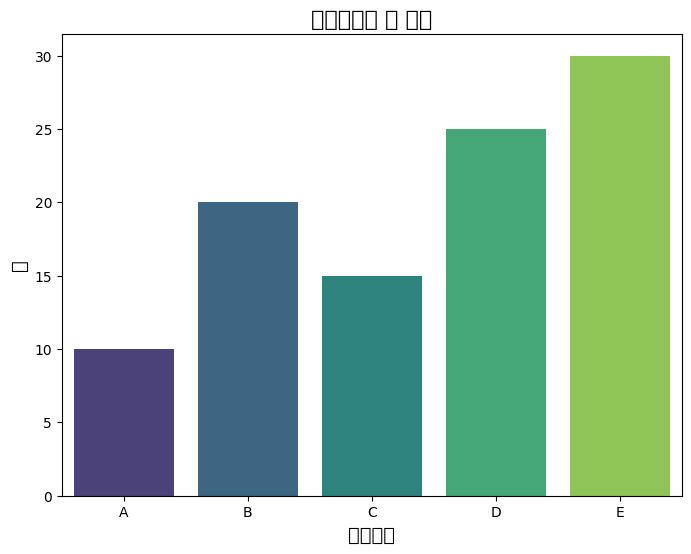

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

# 한글 폰트 설정 함수
def set_korean_font():
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 나눔고딕 폰트 경로
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc('font', family=font_prop.get_name())  # 폰트를 matplotlib에 적용
    mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 폰트 설정 적용
set_korean_font()

# 데이터 샘플
data = {
    '카테고리': ['A', 'B', 'C', 'D', 'E'],
    '값': [10, 20, 15, 25, 30]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 카테고리 분포 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='카테고리', y='값', data=df, palette='viridis')
plt.title('카테고리별 값 분포', fontsize=16)
plt.xlabel('카테고리', fontsize=14)
plt.ylabel('값', fontsize=14)
plt.show()